# Introduction to neural network classification with TensorFlow

In this notebook we're going to learn how to write neural networks for classification problems.

### Creating data to view and fit

In [1]:
from sklearn.datasets import make_circles 

# Make 1000 examples 
n_samples = 1000
# Create circles 
X, y = make_circles(n_samples,
                   noise=0.03,
                   random_state=42)

In [2]:
# Check out features 
X[:5]

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       [-0.39373073,  0.69288277],
       [ 0.44220765, -0.89672343]])

In [3]:
# Check the labels
y[:4]

array([1, 1, 1, 1], dtype=int64)

#### Our data is a little hard to understand right now... let's visualize it!

In [4]:
import pandas as pd 
circles = pd.DataFrame({"X0": X[:, 0], 'X1': X[:, 1], 'label': y})
circles.head()

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


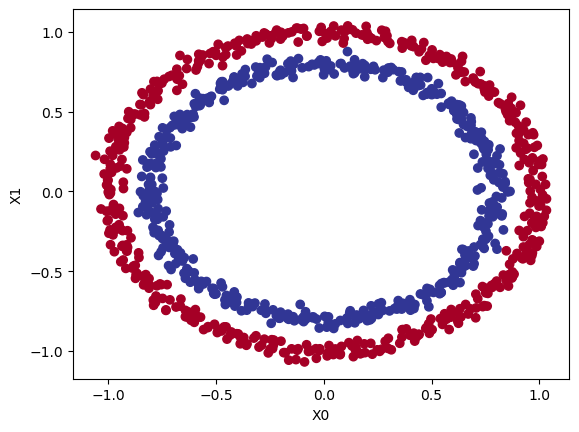

In [5]:
# visualize with a plot 
import matplotlib.pyplot as plt 
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)
plt.xlabel('X0')
plt.ylabel('X1')
plt.show()

### Input and Output shapes

In [6]:
# check the shape of our features and labels 
X.shape, y.shape

((1000, 2), (1000,))

In [7]:
# How many samples we're working 
len(X), len(y)

(1000, 1000)

In [8]:
# View the first example of features and labels 
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

### Steps in modelling

The steps in modelling with Tensorflow are typically:

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate

In [9]:
import tensorflow as tf 
import tensorflow.keras as keras 
from keras import losses, optimizers, layers
 

In [10]:
# 0. Set the seed 
tf.random.set_seed(42)

# 1. Create the model 
model_1 = keras.models.Sequential(
    [
        layers.Dense(1)
    ]
)

# 2. Compile the modle 
model_1.compile(loss=losses.BinaryCrossentropy,
               optimizer=optimizers.SGD(),
               metrics=['accuracy'])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4891 - loss: 4.4117   
Epoch 2/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5001 - loss: 3.7288 
Epoch 3/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5239 - loss: 0.7962 
Epoch 4/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5248 - loss: 0.7084 
Epoch 5/5
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5231 - loss: 0.6949 


In [11]:
# Let's try and improve our model by training for longer..

model_1.fit(X, y, epochs=200, verbose=0)

In [12]:
model_1.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4852 - loss: 0.6927  


[0.6932879686355591, 0.4729999899864197]

Since we are working on a binary classification problem and our model is getting around 50% accuray it's performing as it's just guessing randomly

So let's step things up a notch and add another layer.

In [13]:
# set the seeds
tf.random.set_seed(42)

# Create a model, with two layers 
model_2 = keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model 
model_2.compile(loss=losses.BinaryCrossentropy,
               optimizer=optimizers.SGD(),
               metrics=['accuracy'])

# 3. Fit the model 
model_2.fit(X, y, epochs=100, verbose=0)

In [14]:
# 4. Evaluate the model 
model_2.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4955 - loss: 8.1322   


[8.059046745300293, 0.5]

Still 50% accuracy no good than random guessing.

### Imporving our model 

Let's look into our bag of tricks to see how we can improve oru model.

1. Create a model - we might want to add more layers, more hidden units.
2. Compiling a model - we might want to choose a different optimization function maybe Adam 
3. Fitting a model - Perhaps we might fit our model for more epochs (leave it training for longer.)

In [15]:
# Set the random seed 
tf.random.set_seed(42)

# 1. Create a model (this time 3 layers )
model_3 = keras.Sequential(
    [
        layers.Dense(100),
        layers.Dense(10),
        layers.Dense(1)
    ]
)

# 2. Compile the model 
model_3.compile(
    loss=losses.BinaryCrossentropy,
    optimizer=optimizers.Adam(),
    metrics=['accuracy']
)

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0)

In [16]:
# Evaluate the model 
model_3.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5153 - loss: 0.6914  


[0.6952391266822815, 0.4950000047683716]

**What still aroung 50% accuracy - still random guessing what's happening???**

To visualize our model's predictions, let's create a function `plot_decision_boundary`, this function will:

* Take in a trained model, features (X), labels (y)
* Create a meshgrid of the diffrent X values 
* Make predictions across the meshgrid 
* Plot the predictions as well as a line between zones (where each unique class falls)

In [17]:
import numpy as np 
def plot_decision_boundary(model, X, y):
    """
    Plots the decision boundary created by a model predicting on X.
    """

    # Define the axis boundaries of the plot and create a meshgrid 
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1

    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                        np.linspace(y_min, y_max, 100))

    # Create X value (we're going to make predictions on these)
    x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together

    # Make predictions 
    y_pred = model.predict(x_in)

    # check for multi-class 
    if len(y_pred[0]) > 1:
        print('doing multiclass classification')
        # We have to reshape our prediction to get them ready for plotting 
        y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)

    else:
        print('doing binary classification')
        y_pred = np.round(y_pred).reshape(xx.shape)

    # plot the decision boundary
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
 
    

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
doing binary classification


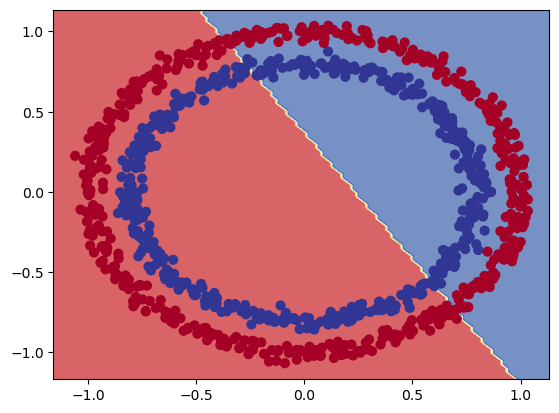

In [18]:
# check out the predictions our model is making 
plot_decision_boundary(model_3, 
                      X, 
                      y)

**OOHHHHH our data is not seperable using straight line we need something curvyyyyyy**

In [25]:
# Let's see if our model can be used for regression problem...

tf.random.set_seed(42)

# Create some regression data 
X_regression = tf.range(0, 1000, 5)
y_regression = tf.range(100, 1100, 5) # y = X + 100

# Split our regression data into training and test sets 
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]


# 1. Create a model (this time 3 layers )
model_3 = keras.Sequential(
    [
        layers.Dense(100),
        layers.Dense(10),
        layers.Dense(1)
    ]
)

# 2. Compile the model 

model_3.compile(
    loss=tf.keras.losses.mae,
    optimizer=optimizers.Adam(),
    metrics=['mae']
)
# Fit our model to the regression data 
model_3.fit(X_reg_train.numpy().reshape(-1, 1), y_reg_train, epochs=100)

Epoch 1/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - loss: 652.0045 - mae: 652.0045
Epoch 2/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 543.1043 - mae: 543.1043 
Epoch 3/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 434.8604 - mae: 434.8604 
Epoch 4/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 325.7754 - mae: 325.7754 
Epoch 5/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 213.7998 - mae: 213.7998 
Epoch 6/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 97.5935 - mae: 97.5935   
Epoch 7/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 56.5818 - mae: 56.5818 
Epoch 8/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 85.8036 - mae: 85.8036 
Epoch 9/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 67.7321 - mae: 67.7321 
Epoch 10/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 43.1425 - mae: 43.1425 
Epoch 11/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 49.3176 - mae: 49.3176 
Epoch 12/100
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 40.0241 - mae: 40.0241 
Epoch 13/100
5

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


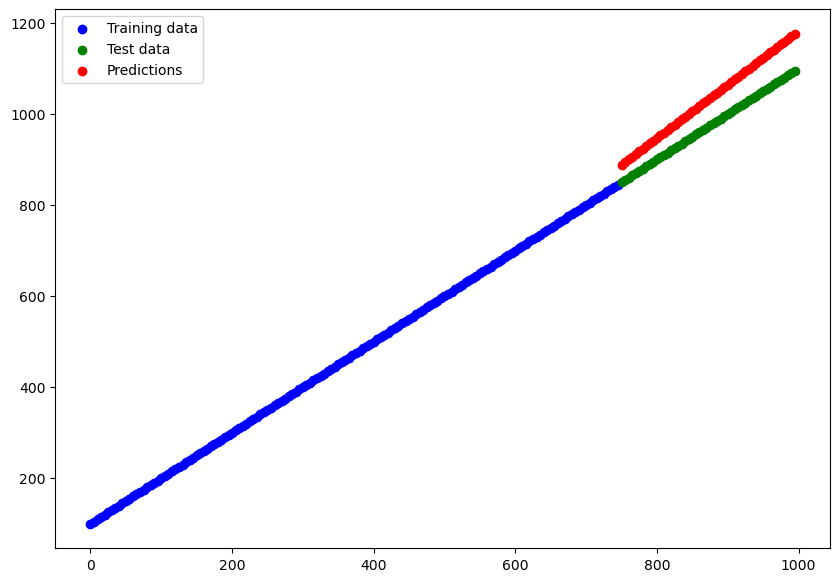

In [26]:
# Make predictions with our trained model 
y_reg_preds = model_3.predict(X_reg_test)

# Plot the model's predicitons against our regression data 
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label='Test data')
plt.scatter(X_reg_test, y_reg_preds, c='r', label='Predictions')
plt.legend()

**WOW same model_3 works on regression problem**

### The missing piece: Non-linearity

In [27]:
# set the random seed 
tf.random.set_seed(42)

# 1. Create the model 
model_4 = tf.keras.Sequential([
    layers.Dense(1, activation=tf.keras.activations.linear)
])

# 2. Compile the model 
model_4.compile(loss = 'binary_crossentropy',
               optimizer=keras.optimizers.Adam(learning_rate=0.001),
               metrics=['accuracy'])

# 3. Fit the model 
history = model_4.fit(X, y, epochs=100, verbose=1)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.3987 - loss: 4.8794   
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4183 - loss: 4.7993 
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4304 - loss: 4.6349 
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4297 - loss: 4.5398 
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4366 - loss: 4.4833 
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4385 - loss: 4.4815 
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4431 - loss: 4.4803 
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4470 - loss: 4.4790 
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4470 - loss: 4.4777 
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4479 - loss: 4.4765 
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4479 - loss: 4.4628 
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/ste

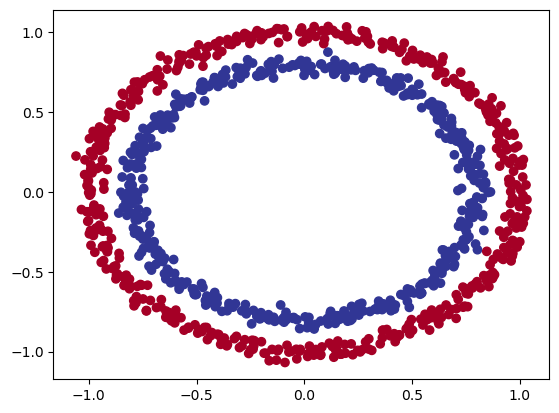

In [28]:
# Check out our data 
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 861us/step
doing binary classification


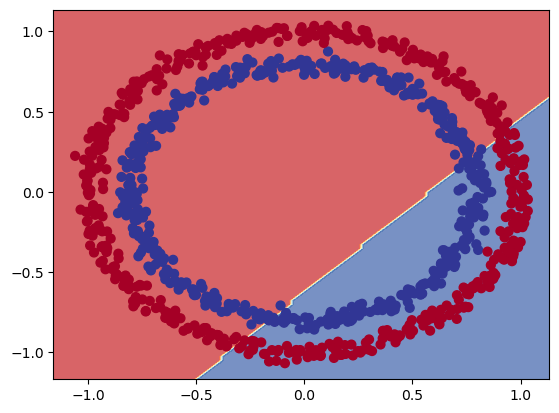

In [30]:
# Check the decision boundary for our latest model 
plot_decision_boundary(model=model_4, 
                      X=X,
                      y=y)

**Let's try build our first neural network with a non-linear activation function.**

In [33]:
# Set random seed 
tf.random.set_seed(42)

# 1. Create a model with a non-linear activation
model_5 = keras.Sequential([
    layers.Dense(1, activation='relu')
])

# 2. Compile the model 
model_5.compile(loss=losses.BinaryCrossentropy(),
               optimizer=optimizers.Adam(learning_rate=0.001),
               metrics=['accuracy'])

# 3. Fit the model 
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4976 - loss: 6.2964   
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5008 - loss: 6.2805 
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5021 - loss: 6.2758 
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5021 - loss: 6.2755 
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4987 - loss: 6.2752 
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4987 - loss: 6.2749 
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4987 - loss: 6.2746 
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4987 - loss: 6.2742 
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4987 - loss: 6.2738 
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4987 - loss: 6.2733 
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4987 - loss: 6.2729 
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/ste

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 877us/step
doing binary classification


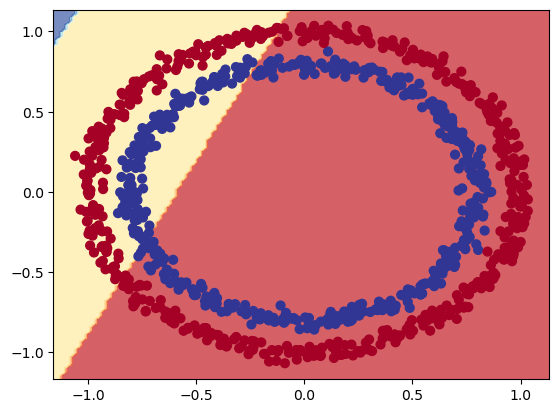

In [34]:
# let's plot decision boundary
plot_decision_boundary(model_5, X, y)

In [42]:
# Time to replicate the multi-layer NN

# set the random seed 
tf.random.set_seed(42)

# 1. Create a model 
model_6 = tf.keras.Sequential([
    layers.Dense(4, activation='relu'),
    layers.Dense(4, activation='relu'),
    layers.Dense(1)
])

# 2. Compile the model 
model_6.compile(loss='binary_crossentropy',
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=['accuracy'])

# 3. fit the model 
history = model_6.fit(X, y, epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4706 - loss: 2.6817
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4774 - loss: 1.2485 
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4781 - loss: 1.0970 
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4735 - loss: 1.0117 
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4650 - loss: 0.9555 
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4598 - loss: 0.9141 
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4325 - loss: 0.8822 
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3986 - loss: 0.8554 
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4058 - loss: 0.8335 
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4125 - loss: 0.8168 
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4244 - loss: 0.8030 
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step -

In [43]:
# Evaluate the model 
model_6.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9055 - loss: 0.3156  


[0.31148561835289, 0.9120000004768372]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 984us/step
doing binary classification


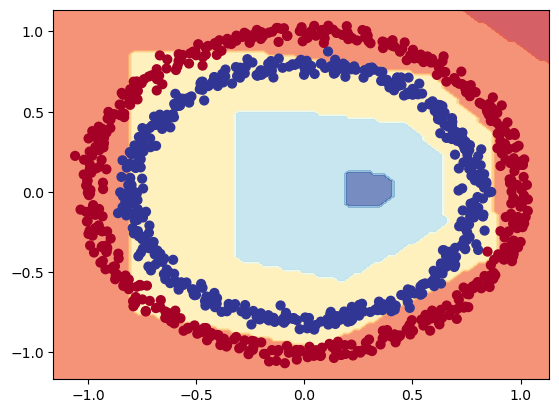

In [44]:
# plot decision boundary
plot_decision_boundary(model_6, X, y)

**Ahh it started capturing the non-linearity in data**

In [45]:
# set random seed 
tf.random.set_seed(42)

# 1. Create a model 
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# 2. Compile a model 

model_7.compile(loss='binary_crossentropy',
               optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
               metrics=['accuracy'])

# 3. Fit the model 
model_7.fit(X, y, epochs=100)

Epoch 1/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4925 - loss: 0.7000
Epoch 2/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5132 - loss: 0.6904 
Epoch 3/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5208 - loss: 0.6854 
Epoch 4/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5184 - loss: 0.6822 
Epoch 5/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5258 - loss: 0.6801 
Epoch 6/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5347 - loss: 0.6786 
Epoch 7/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5412 - loss: 0.6773 
Epoch 8/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5459 - loss: 0.6761 
Epoch 9/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5478 - loss: 0.6749 
Epoch 10/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5526 - loss: 0.6736 
Epoch 11/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5513 - loss: 0.6724 
Epoch 12/100
32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step -

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step  
doing binary classification


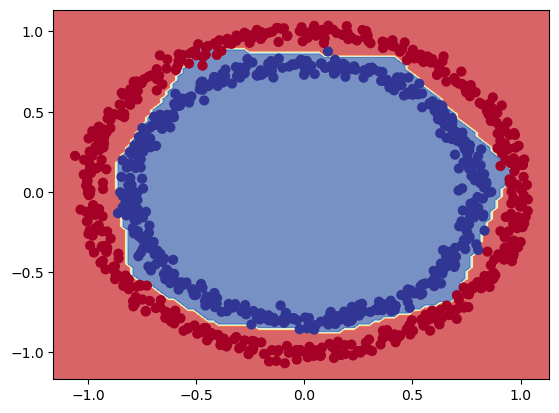

In [46]:
# plot decision boundary
plot_decision_boundary(model_7, X, y)

**Wow accuracy around 97% and it seems the model fits the data well**

In [47]:
model_7.evaluate(X, y)

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9893 - loss: 0.2210  


[0.2190062254667282, 0.9850000143051147]

**Question:** What's wrong with the predictions we've made? Are we really evaluating our model correctly? What data did the model learn on and what data did we predict on? 

**Note:** The combination of **linear (straight lines) and non-linear (non-straight lines) functions** is one of the key fundamentals of neural networks.

Now we've discussed the concept of linear and non-linear functions(or lines), let's see themm in action.

In [48]:
# Create a toy tensor (similar to the data we pass into our models)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

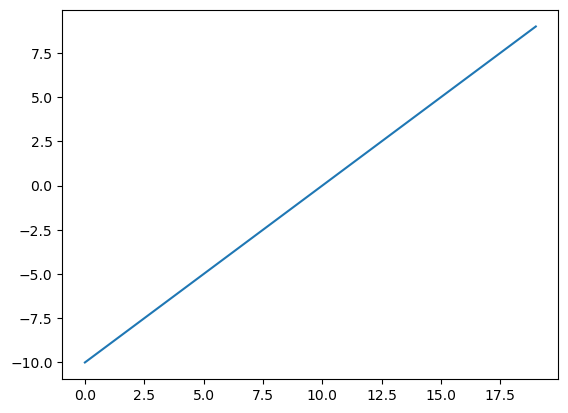

In [49]:
plt.plot(A)

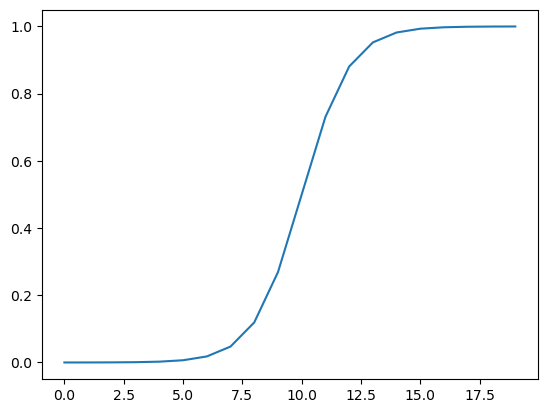

In [50]:
plt.plot(tf.keras.activations.sigmoid(A))

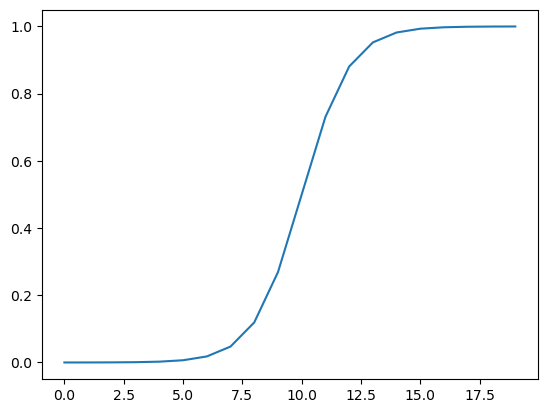

In [52]:

# Let's start by replicating sigmoid 
def sigmoid(x):
    return 1 / (1 + tf.exp(-x))

plt.plot(sigmoid(A))

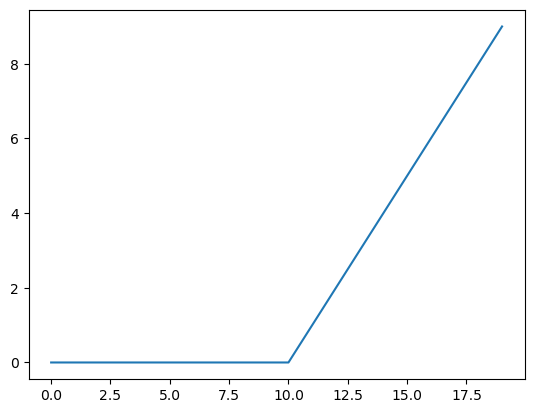

In [55]:
# plot relu 
def relu(x):
    return tf.maximum(0, x)

plt.plot(relu(A))

### Evaluating and improving our classification model 

so far we've been training and testing on the same dataset...

However, in ml this is basically as sin.

so let's create a training and test set.

In [56]:
# Check how many samples we have 
len(X)

1000

In [57]:
# Split into train and test sets 
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

In [76]:
# Let's recreate a model to fit on the training data and evaluate on testing data
tf.random.set_seed(42)

# 1. Create a model 
model_8 = tf.keras.Sequential([
    layers.Dense(4, activation='relu'),
    layers.Dense(4, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# 2. Compile the model 
model_8.compile(loss=losses.BinaryCrossentropy(),
               optimizer=optimizers.Adam(learning_rate=0.01),
               metrics=['accuracy'])

# 3. Fit the model 
history = model_8.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4857 - loss: 0.7006
Epoch 2/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5449 - loss: 0.6831 
Epoch 3/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5779 - loss: 0.6697 
Epoch 4/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6781 - loss: 0.6522 
Epoch 5/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6763 - loss: 0.6324 
Epoch 6/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7340 - loss: 0.6058 
Epoch 7/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7772 - loss: 0.5679 
Epoch 8/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7967 - loss: 0.5266 
Epoch 9/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8301 - loss: 0.4886 
Epoch 10/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8371 - loss: 0.4527 
Epoch 11/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8454 - loss: 0.4191 
Epoch 12/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0

In [77]:
# 4. Evaluate the model on test set 
model_8.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9424 - loss: 0.1648  


[0.16627106070518494, 0.9350000023841858]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 885us/step
doing binary classification
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 907us/step
doing binary classification


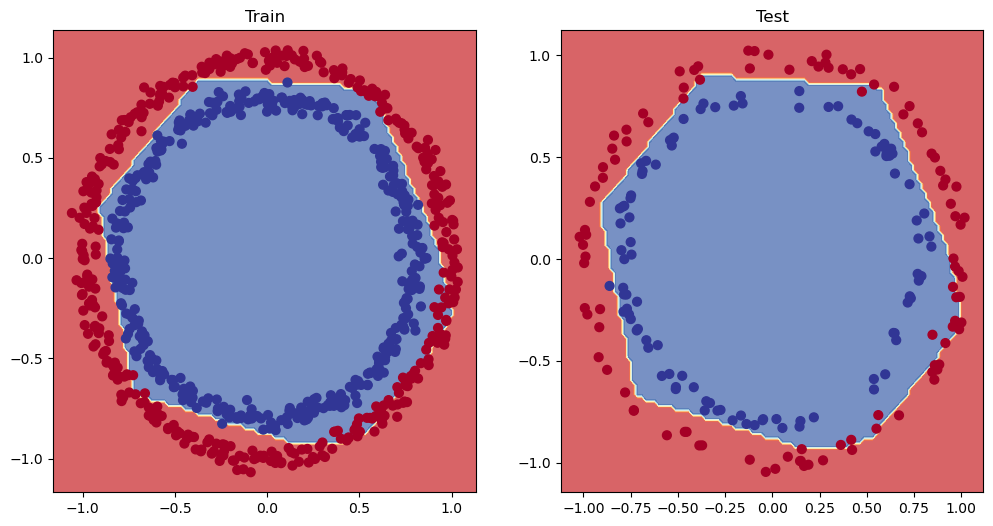

In [78]:
# Plot the decision boundaries for train and test sets 
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model_8, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model_8, X_test, y_test)

### Plot the loss (or training) curves

In [79]:
pd.DataFrame(history.history)

,accuracy,loss
0,0.53000,0.693703
1,0.57375,0.679341
2,0.61875,0.665136
3,0.69000,0.644462
4,0.72500,0.620528
5,0.77750,0.589768
6,0.82375,0.547804
7,0.82875,0.505586
8,0.84000,0.467505
9,0.85125,0.431246


Text(0.5, 1.0, 'Model_8 loss curves')

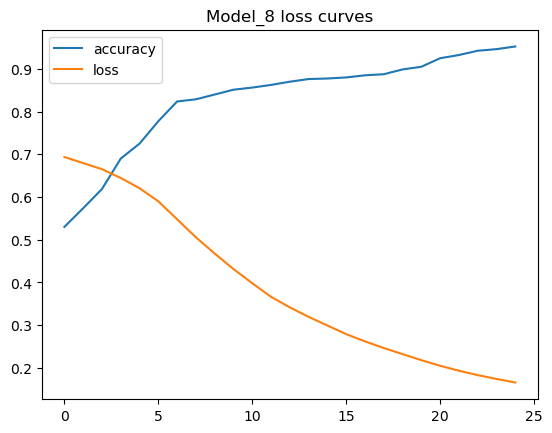

In [80]:
pd.DataFrame(history.history).plot()
plt.title('Model_8 loss curves')

**Note:** For many problems, the loss function going down means the model is improving.

## Finding the best learning rate 

To find the ideal learning rate (the learning rate where the loss decreases the most during training) we're going to use the following steps:
* A learning rate **callback** - you can think of callback as an extra piecec of functionality, you can dd to you *while* its training.
* Another model (we could use the same one as above, but we're practicing building models here)
* A modified loss curves plot.


In [81]:
# set random seed 
tf.random.set_seed(42)

# create a model (same as model_8)
# 1. Create a model 
model_9 = tf.keras.Sequential([
    layers.Dense(4, activation='relu'),
    layers.Dense(4, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# 2. Compile the model 
model_9.compile(loss=losses.BinaryCrossentropy(),
               optimizer=optimizers.Adam(learning_rate=0.01),
               metrics=['accuracy'])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))


# 3. Fit the model (passing lr_sclr_scheduler callback)
history = model_9.fit(X_train, y_train, epochs=100, callbacks=[lr_scheduler])

Epoch 1/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.5069 - loss: 0.7201 - learning_rate: 1.0000e-04
Epoch 2/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5079 - loss: 0.7191 - learning_rate: 1.1220e-04
Epoch 3/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5067 - loss: 0.7181 - learning_rate: 1.2589e-04
Epoch 4/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5069 - loss: 0.7170 - learning_rate: 1.4125e-04
Epoch 5/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5045 - loss: 0.7158 - learning_rate: 1.5849e-04
Epoch 6/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5075 - loss: 0.7147 - learning_rate: 1.7783e-04
Epoch 7/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5138 - loss: 0.7135 - learning_rate: 1.9953e-04
Epoch 8/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5122 - loss: 0.7122 - learning_rate: 2.2387e-04
Epoch 9/100
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5104 - loss: 0.7110 - learning_

<Axes: xlabel='epochs'>

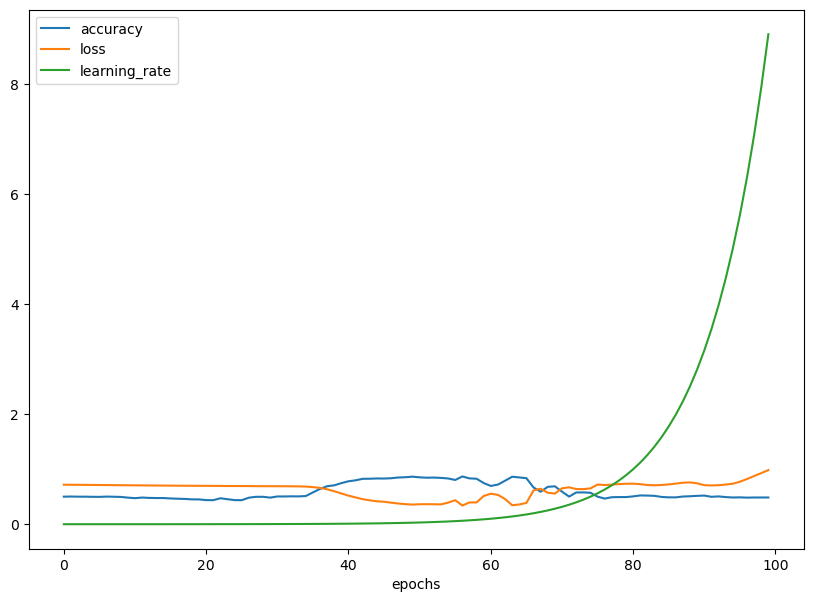

In [82]:
# Check out the history 
pd.DataFrame(history.history).plot(figsize=(10, 7), xlabel='epochs')

Text(0.5, 1.0, 'Learning rate vs loss')

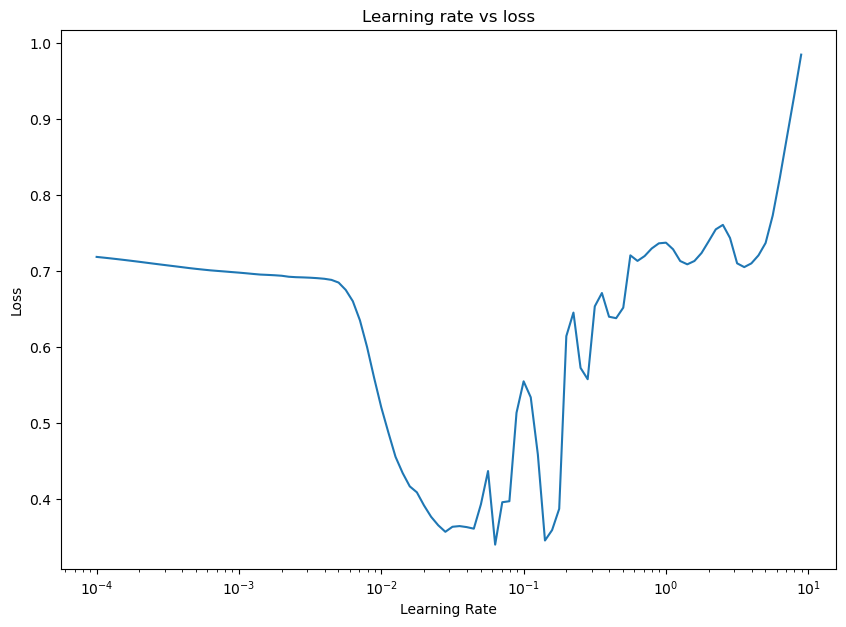

In [83]:
# Plot the learning rate versus the loss 
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history.history['loss'])
plt.xlabel('Learning Rate')
plt.ylabel("Loss")
plt.title('Learning rate vs loss')


In [84]:
# Example of other typical learning rates values

10**0, 10**-1, 10**-2, 10**-3

(1, 0.1, 0.01, 0.001)

In [89]:
# Let's train our new model with our best learning rate 

# set random seed 
tf.random.set_seed(42)

# create the model 
model_10 = keras.Sequential([
    layers.Dense(4, activation='relu'),
    layers.Dense(4, activation='relu'),
    layers.Dense(1, activation='sigmoid')
])

# compile the model 
model_10.compile(loss=losses.BinaryCrossentropy(),
                optimizer=optimizers.Adam(learning_rate=0.02),
                metrics=['accuracy'])

# Fit the model for 20 epochs 
history_10 = model_10.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.4664 - loss: 0.7044
Epoch 2/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5047 - loss: 0.6918 
Epoch 3/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5291 - loss: 0.6883 
Epoch 4/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5904 - loss: 0.6806 
Epoch 5/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6039 - loss: 0.6574 
Epoch 6/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7047 - loss: 0.6062 
Epoch 7/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7812 - loss: 0.5409 
Epoch 8/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8421 - loss: 0.4684 
Epoch 9/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8950 - loss: 0.4043 
Epoch 10/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9208 - loss: 0.3491 
Epoch 11/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9603 - loss: 0.3004 
Epoch 12/25
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0

In [90]:
# Evaluate model 10 on the test dataset 
model_10.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9950 - loss: 0.0710  


[0.0713527500629425, 0.9950000047683716]

In [91]:
# Evaluate model 8 on the test dataset 
model_8.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9424 - loss: 0.1648 


[0.16627106070518494, 0.9350000023841858]

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 891us/step
doing binary classification
313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 834us/step
doing binary classification


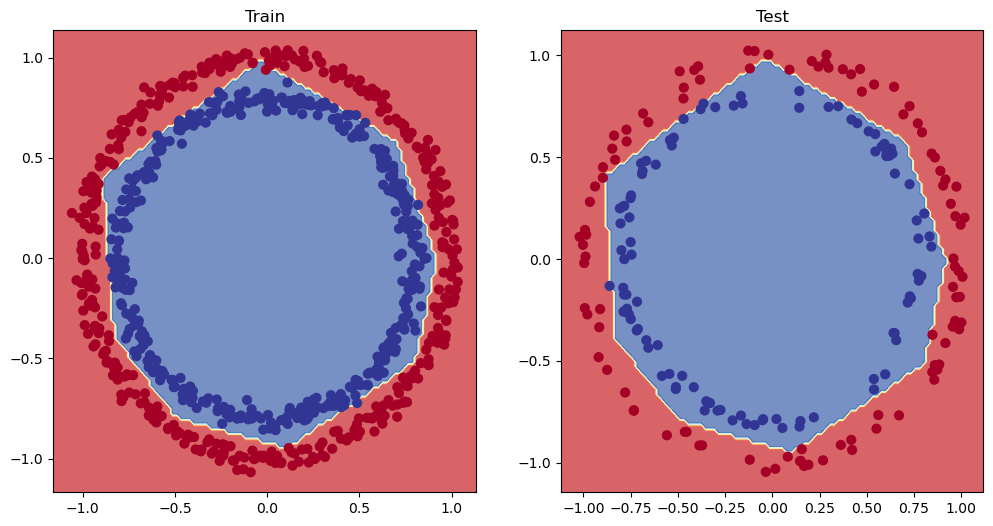

In [92]:
# plot the decision boundaries for training and test sets 
# Plot the decision boundaries for train and test sets 
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title('Train')
plot_decision_boundary(model_10, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title('Test')
plot_decision_boundary(model_10, X_test, y_test)

## More classification evaluation methods 

ALongside visualizing our models results as much as possible, there are handful of other evaluation metrics we should be familier with:
* Accuracy
* Precision - high precision less false positive
* Recall - high recall less false negatives
* F1-score
* Confusion matrix
* Classification report (from scikit-learn)

In [93]:
# check the accuracy of our model 
loss, accuracy = model_10.evaluate(X_test, y_test)
print(f'Model loss on the test set: {loss}')
print(f'Model accuracy on the test set: {(accuracy*100):.2f}%')

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.9950 - loss: 0.0710 
Model loss on the test set: 0.0713527500629425
Model accuracy on the test set: 99.50%


### How about a confusion matrix?

In [99]:
# Create a confusion matrix 
from sklearn.metrics import confusion_matrix

# Make predictions 
y_preds = model_10.predict(X_test)
y_preds = tf.round(y_preds)
# Create confusion matrix 
confusion_matrix(y_test, y_preds)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


array([[101,   0],
       [  1,  98]], dtype=int64)

How about we prettify our confusion matrix?

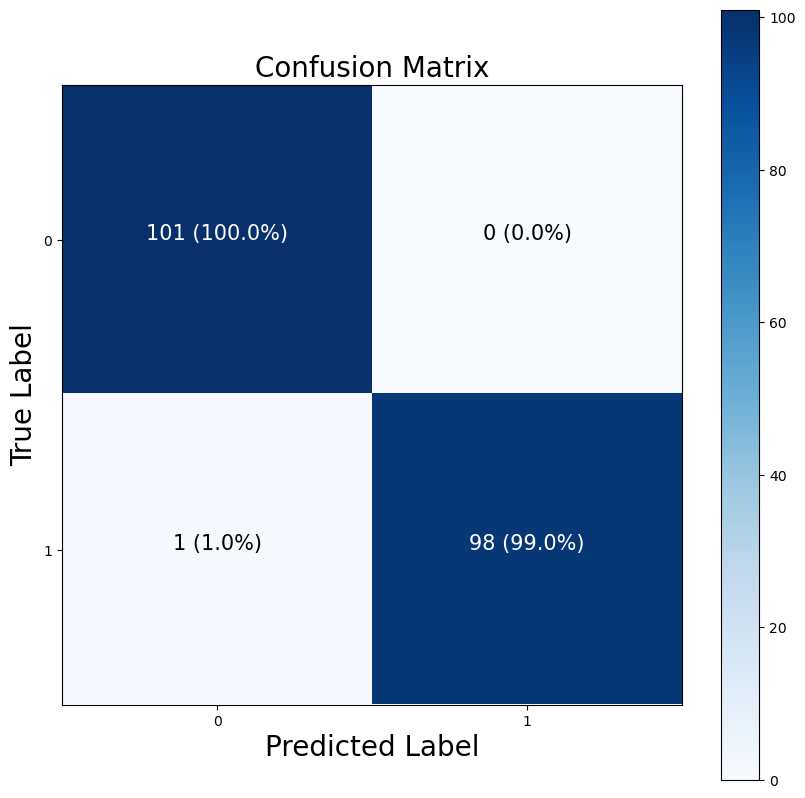

In [102]:
import itertools 

figsize = (10, 10)

# Create the confusion matrix 
cm = confusion_matrix(y_test, y_preds)
cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
n_classes = cm.shape[0]

# Let's prettify it
fig, ax = plt.subplots(figsize=figsize)
# Create a matrix plot 
cax = ax.matshow(cm, cmap=plt.cm.Blues)
fig.colorbar(cax)

# Create classes 
classes = False 

if classes:
    labels = classes 
else:
    labels = np.arange(cm.shape[0])

# Label the axes 
ax.set(title='Confusion Matrix',
      xlabel='Predicted Label',
      ylabel='True Label',
      xticks=np.arange(n_classes),
      yticks=np.arange(n_classes),
      xticklabels=labels,
      yticklabels=labels)

# SEt x-axis labels to bottom 
ax.xaxis.set_label_position('bottom')
ax.xaxis.tick_bottom()

# Adjust label size 
ax.yaxis.label.set_size(20)
ax.xaxis.label.set_size(20)
ax.title.set_size(20)
# Set threshold for different colors 
threshold = (cm.max() + cm.min()) / 2.

# Plot the text on each cell 
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, f'{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)',
            horizontalalignment='center',
            color='white' if cm[i, j] > threshold else 'black',
            size=15)

## Working with a larger example (multiclass classification)

**When you have more than 2 classes as an option, it's known as multi-class classification**
* This means if you have 3 different classes, it's multi-class classification.
* It also means if you have 1000 diff classes it's multi-class classification.

To practice multi-class classification we are going to build NN to classify images of items of clothing.

In [1]:
import tensorflow as tf 
import tensorflow.keras as keras 
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us 
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step 
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [2]:
# Show the first training example 
print(f'Training sample:\n{train_data[0]}\n')
print(f'Training label:\n{train_labels[0]}\n')

Training sample:
[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1  

In [4]:
# Check the shape of single example 
train_data[0].shape, train_labels[0].shape

((28, 28), ())

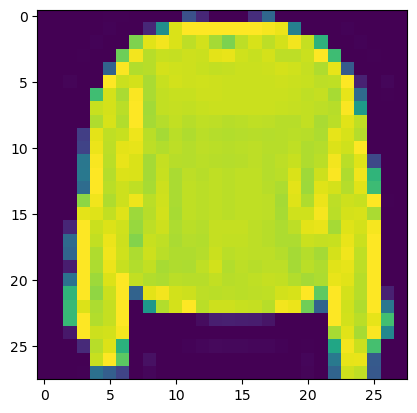

In [11]:
# Plot a single sample 
import matplotlib.pyplot as plt 
plt.imshow(train_data[7]);

In [12]:
# Check our samples label
train_labels[7]

2

In [13]:
# Create a small list so we can index onto our training labels so they're human redable
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
len(class_names)

10

Text(0.5, 1.0, 'T-shirt/top')

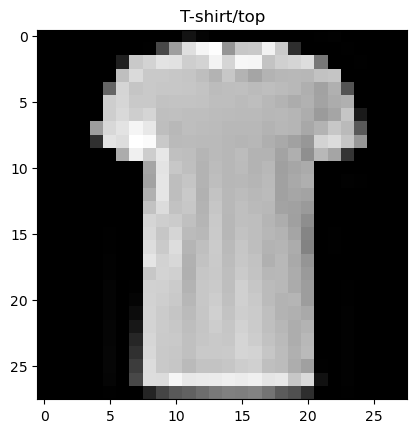

In [15]:
# Plot an example image and it's label 
plt.imshow(train_data[17], cmap='gray')
plt.title(class_names[train_labels[17]])

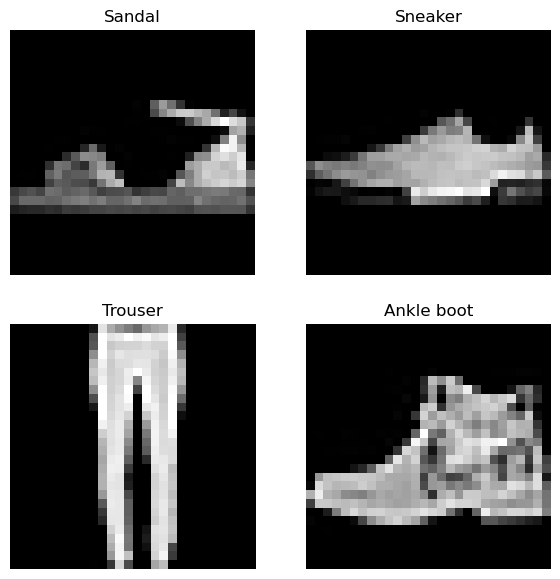

In [23]:
# Plot multiplot random images of fashion MNIST 
import random 
plt.figure(figsize=(7, 7))
for i in range(4):
    ax = plt.subplot(2, 2, i+1)
    rand_index = random.choice(range(len(train_data)))
    plt.imshow(train_data[rand_index], cmap='gray')
    plt.title(class_names[train_labels[rand_index]])
    plt.axis(False)

### Building a multi-class classification model

We can use our similar architecture to our binary classifier but with some tweaks:
* Input shape = 28 * 28 (the shape of one image)
* Output shape = 10 (one per class of clothing)
* Loss function = tf.keras.losses.CategoricalCrossentropy()
* Output Layer activation = Softmax (not sigmoid)

In [33]:
# Set random seed 
tf.random.set_seed(42)

# Create the model 
model_11 = tf.keras.Sequential([
    tf.keras.Input(shape=(28, 28)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(4, activation='relu'),
    tf.keras.layers.Dense(10, activation='softmax')
])


# compile the model 
model_11.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['accuracy'])

# Fit the model 
non_norm_history = model_11.fit(train_data, 
                               train_labels,
                               epochs=10,
                               validation_data=(test_data, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.1200 - loss: 3.8946 - val_accuracy: 0.2011 - val_loss: 1.9784
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1978 - loss: 1.9729 - val_accuracy: 0.2182 - val_loss: 1.9070
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2376 - loss: 1.8595 - val_accuracy: 0.2709 - val_loss: 1.7108
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2743 - loss: 1.6979 - val_accuracy: 0.2585 - val_loss: 1.6765
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.2699 - loss: 1.6702 - val_accuracy: 0.2619 - val_loss: 1.6573
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2671 - loss: 1.6536 - val_accuracy: 0.2736 - val_loss: 1.6417
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2763 - loss: 1.6433 - val_accuracy: 0.2928 - val_loss: 1.6312
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.2938 - loss: 1.6336 - 

In [34]:
# Check the model summary
model_11.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_4 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_15 (Dense)                     │ (None, 4)                   │           3,140 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_16 (Dense)                     │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 10)                  │              50 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

In [35]:
# Check the min and max values of the training data
train_data.min(), train_data.max()

(0, 255)

Neural Networks prefer data to be scaled (or normalized), this means they like to have the numbers in the tensor they try to find pattern between 0 and 1.

In [36]:
# We can get our training and testing data between 0 and 1 by dividing by the maximum
train_data_norm = train_data / 255.0
test_data_norm = test_data / 255.0 

# Check the min and max values of the scaled training data 
train_data_norm.min(), train_data_norm.max()

(0.0, 1.0)

In [37]:
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Input
from tensorflow.keras import Sequential
# Set random seed 
tf.random.set_seed(42)

# Create a model (same as model_11)
model_12 = Sequential([
    Input(shape=(28, 28)),
    Flatten(),
    Dense(4, activation='relu'),
    Dense(4, activation='relu'),
    Dense(10, activation='softmax')
])

# compile a model 
model_12.compile(loss = SparseCategoricalCrossentropy(),
                optimizer=Adam(),
                metrics=['accuracy'])

# Fit the model  
norm_history = model_12.fit(train_data_norm, 
                               train_labels,
                               epochs=10,
                               validation_data=(test_data_norm, test_labels))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.3362 - loss: 1.7609 - val_accuracy: 0.5687 - val_loss: 1.0451
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6269 - loss: 0.9557 - val_accuracy: 0.7481 - val_loss: 0.7067
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7525 - loss: 0.6761 - val_accuracy: 0.7580 - val_loss: 0.6655
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7621 - loss: 0.6289 - val_accuracy: 0.7684 - val_loss: 0.6392
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7717 - loss: 0.6027 - val_accuracy: 0.7772 - val_loss: 0.6234
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7847 - loss: 0.5851 - val_accuracy: 0.7911 - val_loss: 0.6107
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7998 - loss: 0.5684 - val_accuracy: 0.7965 - val_loss: 0.6004
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8078 - loss: 0.5554 - 

> **NOTE** Neural Networks tend to prefer data in numerical form as well as scaled/normalized(numbers b/w 0 and 1)

In [45]:
import pandas as pd
non_norm_history_df = pd.DataFrame(non_norm_history.history)
norm_history_df = pd.DataFrame(norm_history.history)

In [46]:
norm_history_df

,accuracy,loss,val_accuracy,val_loss
0,0.465900,1.406322,0.5687,1.045059
1,0.683050,0.845987,0.7481,0.706697
2,0.756283,0.656594,0.7580,0.665527
3,0.765583,0.616777,0.7684,0.639200
4,0.775000,0.594675,0.7772,0.623368
5,0.788450,0.578215,0.7911,0.610687
6,0.801733,0.562740,0.7965,0.600354
7,0.808567,0.550750,0.7978,0.593481
8,0.811650,0.541786,0.8012,0.584265
9,0.814483,0.533322,0.8018,0.580502


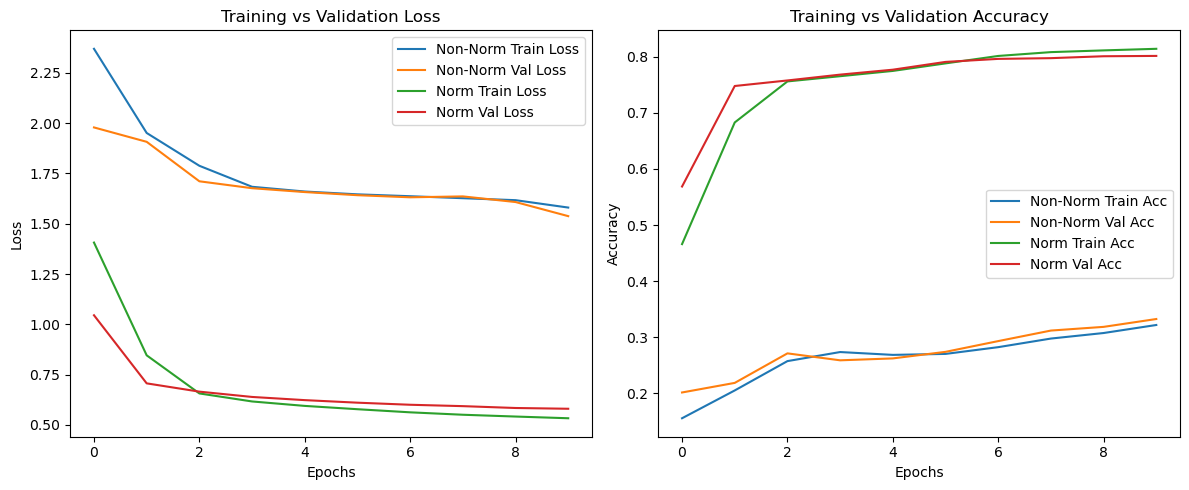

In [47]:
# Plotting loss curves
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# ---- Plot Loss ----
axes[0].plot(non_norm_history_df['loss'], label='Non-Norm Train Loss')
axes[0].plot(non_norm_history_df['val_loss'], label='Non-Norm Val Loss')
axes[0].plot(norm_history_df['loss'], label='Norm Train Loss')
axes[0].plot(norm_history_df['val_loss'], label='Norm Val Loss')
axes[0].set_title('Training vs Validation Loss')
axes[0].set_xlabel('Epochs')
axes[0].set_ylabel('Loss')
axes[0].legend()

# ---- Plot Accuracy ----
axes[1].plot(non_norm_history_df['accuracy'], label='Non-Norm Train Acc')
axes[1].plot(non_norm_history_df['val_accuracy'], label='Non-Norm Val Acc')
axes[1].plot(norm_history_df['accuracy'], label='Norm Train Acc')
axes[1].plot(norm_history_df['val_accuracy'], label='Norm Val Acc')
axes[1].set_title('Training vs Validation Accuracy')
axes[1].set_xlabel('Epochs')
axes[1].set_ylabel('Accuracy')
axes[1].legend()

plt.tight_layout()
plt.show()


### Finding the ideal learning rate

In [50]:
# Set seed 
tf.random.set_seed(42)

# Create model 
model_13 = tf.keras.Sequential([
    Input(shape=(28, 28)),
    Flatten(),
    Dense(4, activation='relu'),
    Dense(4, activation='relu'),
    Dense(10, activation='softmax')
    
])

# compile a model 
model_13.compile(loss=SparseCategoricalCrossentropy(),
                optimizer=Adam(),
                metrics=['accuracy'])

# Create the learning rate callback 
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# fit the model 
find_lr_history = model_13.fit(train_data_norm,
                              train_labels,
                              epochs=40,
                              validation_data=(test_data_norm, test_labels),
                              callbacks=[lr_scheduler])

Epoch 1/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.3098 - loss: 1.7541 - val_accuracy: 0.4342 - val_loss: 1.3685 - learning_rate: 0.0010
Epoch 2/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.4544 - loss: 1.3045 - val_accuracy: 0.5402 - val_loss: 1.0986 - learning_rate: 0.0011
Epoch 3/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.6177 - loss: 1.0263 - val_accuracy: 0.6968 - val_loss: 0.8578 - learning_rate: 0.0013
Epoch 4/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7103 - loss: 0.8170 - val_accuracy: 0.7398 - val_loss: 0.7039 - learning_rate: 0.0014
Epoch 5/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7535 - loss: 0.6755 - val_accuracy: 0.7622 - val_loss: 0.6480 - learning_rate: 0.0016
Epoch 6/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7717 - loss: 0.6276 - val_accuracy: 0.7710 - val_loss: 0.6237 - learning_rate: 0.0018
Epoch 7/40
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.7818 - l

Text(0.5, 1.0, 'Finding the idean learning rate')

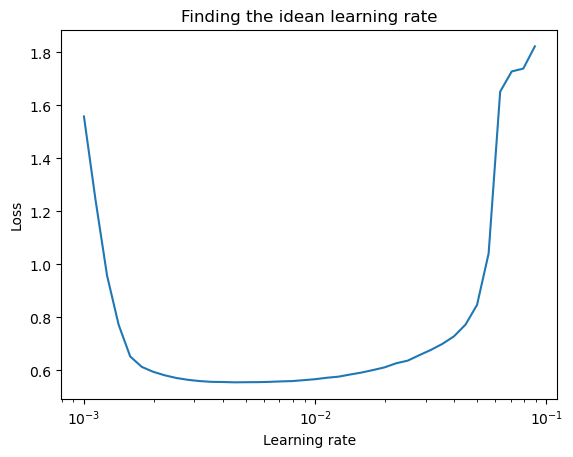

In [51]:
# Plot the learning rate decay curve 
import numpy as np 

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history['loss'])
plt.xlabel('Learning rate')
plt.ylabel('Loss')
plt.title("Finding the idean learning rate")

In [52]:
10**-3

0.001

In [54]:
# Set random seed 
tf.random.set_seed(42)

# Create a model 
model_14 = Sequential([
    Input(shape=(28, 28)),
    Flatten(),
    Dense(4, activation='relu'),
    Dense(4, activation='relu'),
    Dense(10, activation='softmax')
])

# compile a model 
model_14.compile(loss = SparseCategoricalCrossentropy(),
                optimizer=Adam(learning_rate=0.001),
                metrics=['accuracy'])

# Fit the model  
history_14 = model_14.fit(train_data_norm, 
                               train_labels,
                               epochs=20,
                               validation_data=(test_data_norm, test_labels))

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 3ms/step - accuracy: 0.2956 - loss: 1.8273 - val_accuracy: 0.5535 - val_loss: 1.1761
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 3ms/step - accuracy: 0.5997 - loss: 1.0959 - val_accuracy: 0.6453 - val_loss: 0.9279
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6585 - loss: 0.8968 - val_accuracy: 0.6688 - val_loss: 0.8615
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.6864 - loss: 0.8381 - val_accuracy: 0.7243 - val_loss: 0.7972
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7319 - loss: 0.7692 - val_accuracy: 0.7322 - val_loss: 0.7613
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7419 - loss: 0.7340 - val_accuracy: 0.7429 - val_loss: 0.7309
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7526 - loss: 0.7048 - val_accuracy: 0.7465 - val_loss: 0.7128
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7579 - loss: 0.6831 - 

### Evaluating oru multi-class classification model

To evaluate our multi-class classification model we could:
* Evaluate it's performance using other classification metrics (such as conf mat)
* Asses some of its predictions (through visualization)
* Improve it's results (by training it for longer or changing the architecture)
* Save and export it for use in an application.

Let's go through the top 2....

In [55]:
# Create a confusion matrix 
import itertools 
from sklearn.metrics import confusion_matrix


def make_confusion_matrix(y_true, y_pred, classes=None, figsize=(10, 10), text_size=15):

    # Create the confusion matrix 
    cm = confusion_matrix(y_true, y_pred)
    cm_norm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] # normalize our confusion matrix
    n_classes = cm.shape[0]
    
    # Let's prettify it
    fig, ax = plt.subplots(figsize=figsize)
    # Create a matrix plot 
    cax = ax.matshow(cm, cmap=plt.cm.Blues)
    fig.colorbar(cax)

    # Set labels to be classes
    if classes:
        labels = classes 
    else:
        labels = np.arange(cm.shape[0])
    
    # Label the axes 
    ax.set(title='Confusion Matrix',
          xlabel='Predicted Label',
          ylabel='True Label',
          xticks=np.arange(n_classes),
          yticks=np.arange(n_classes),
          xticklabels=labels,
          yticklabels=labels)
    
    # SEt x-axis labels to bottom 
    ax.xaxis.set_label_position('bottom')
    ax.xaxis.tick_bottom()
    
    # Adjust label size 
    ax.yaxis.label.set_size(text_size)
    ax.xaxis.label.set_size(text_size)
    ax.title.set_size(text_size)
    # Set threshold for different colors 
    threshold = (cm.max() + cm.min()) / 2.
    
    # Plot the text on each cell 
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, f'{cm[i, j]} ({cm_norm[i, j]*100:.1f}%)',
                horizontalalignment='center',
                color='white' if cm[i, j] > threshold else 'black',
                size=text_size)



In [56]:
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [58]:
# make some predictions with our model
y_probs = model_14.predict(test_data_norm)

# View the first 5 predictions 
y_probs[:5]

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step  


array([[5.4943048e-06, 2.1697761e-07, 3.4210327e-05, 2.2599152e-03,
        1.8888153e-04, 2.1754539e-01, 2.3678209e-05, 1.4002544e-01,
        4.6199583e-03, 6.3529676e-01],
       [1.6809598e-03, 2.3202440e-06, 6.5052170e-01, 8.7483830e-05,
        2.3455235e-01, 1.3571826e-19, 1.1313061e-01, 0.0000000e+00,
        2.4555942e-05, 0.0000000e+00],
       [1.1684773e-05, 9.9294150e-01, 7.0245536e-03, 1.2606424e-07,
        6.4974361e-06, 3.7302247e-21, 1.5676371e-05, 0.0000000e+00,
        3.9286022e-13, 0.0000000e+00],
       [1.1441118e-04, 9.9423403e-01, 5.5574914e-03, 3.1000741e-06,
        1.0982451e-05, 3.1892250e-17, 7.9977377e-05, 0.0000000e+00,
        1.3708987e-11, 0.0000000e+00],
       [1.5707971e-01, 5.9995344e-03, 1.3129042e-01, 3.2847568e-01,
        5.1714439e-02, 3.5933854e-06, 3.2164499e-01, 4.0450968e-18,
        3.7916512e-03, 2.1891395e-15]], dtype=float32)

In [61]:
y_probs[0], tf.argmax(y_probs[0])

(array([5.4943048e-06, 2.1697761e-07, 3.4210327e-05, 2.2599152e-03,
        1.8888153e-04, 2.1754539e-01, 2.3678209e-05, 1.4002544e-01,
        4.6199583e-03, 6.3529676e-01], dtype=float32),
 <tf.Tensor: shape=(), dtype=int64, numpy=9>)

In [62]:
class_names[tf.argmax(y_probs[0])]

'Ankle boot'

In [64]:
# Convert all of the prediction probs into integers
y_preds = y_probs.argmax(axis=1)

# View the first 10 pred labels
y_preds[:10]

array([9, 2, 1, 1, 3, 1, 4, 6, 5, 7], dtype=int64)

In [65]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_true=test_labels, y_pred=y_preds)

array([[705,  37,  18, 178,   1,   1,  45,   0,  15,   0],
       [  7, 940,  15,  29,   1,   0,   7,   0,   0,   1],
       [ 10,  26, 670,  39, 136,   0, 117,   0,   2,   0],
       [ 37,   8,  13, 806,   1,   0, 103,   0,   8,  24],
       [  0,   3, 137,  18, 608,   0, 214,   0,  20,   0],
       [  0,   0,   0,   2,   0, 919,   0,  46,   4,  29],
       [143,  14, 111, 184, 186,   0, 335,   0,  27,   0],
       [  0,   0,   0,   1,   0,  31,   0, 924,   2,  42],
       [  0,   0,   2,  22,  18,   5,  27,  23, 901,   2],
       [  0,   0,   0,   6,   0,  18,   1,  47,   0, 928]], dtype=int64)

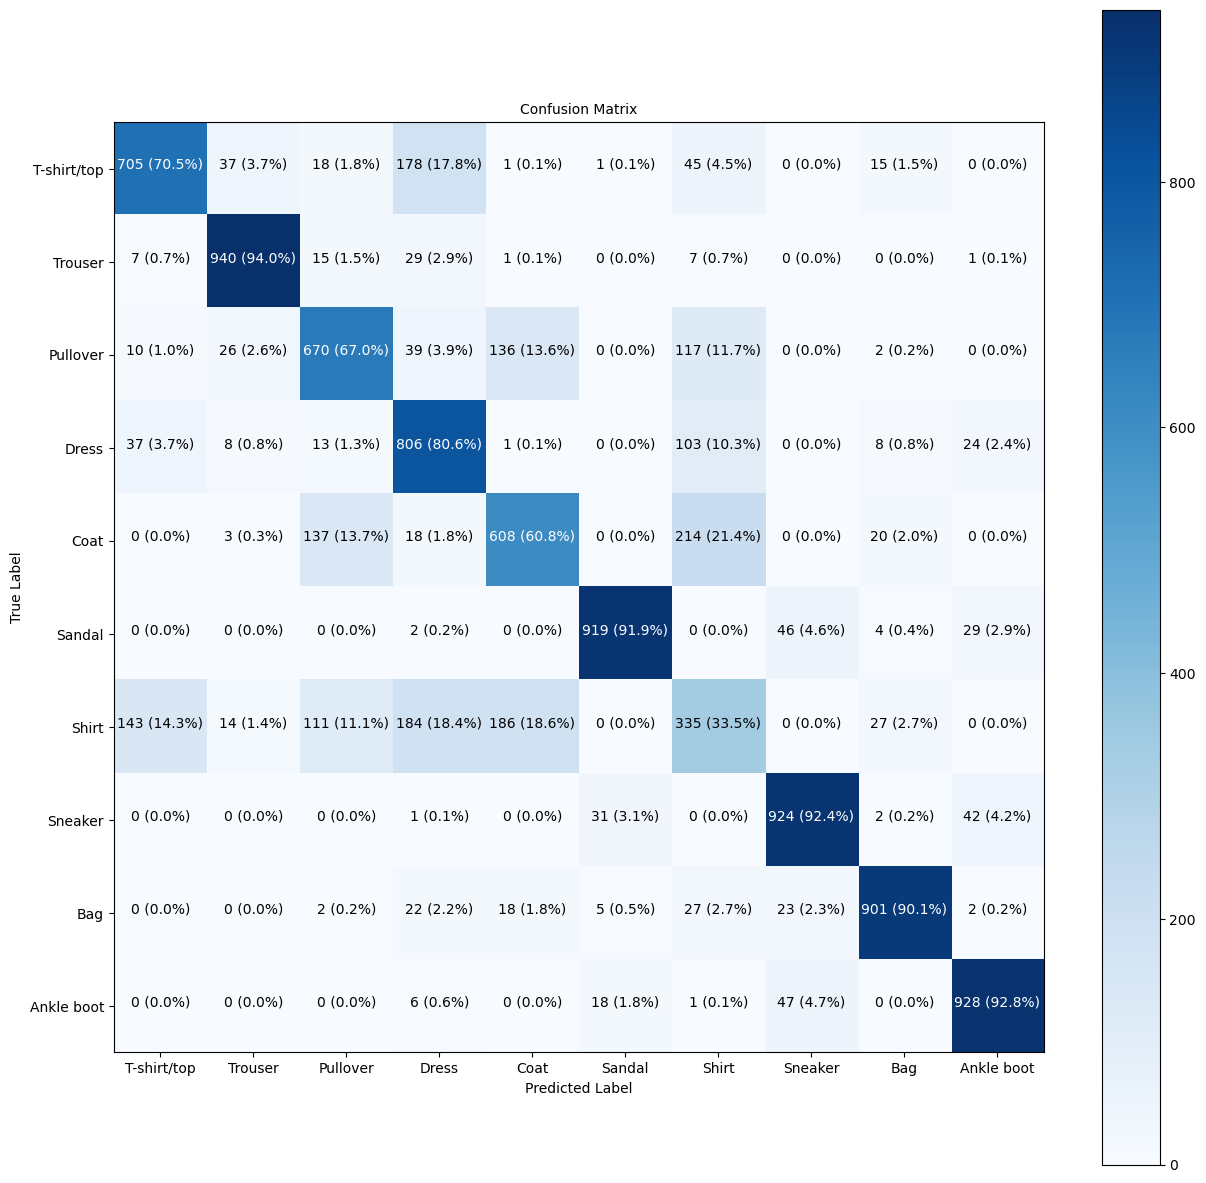

In [67]:
make_confusion_matrix(y_true=test_labels, y_pred=y_preds,
                     classes=class_names,
                     figsize=(15, 15),
                     text_size=10)

> **NOTE:** Often when working with images and other forms of visual data, it's good idea to visualize as much as possible to develop a further understanding of the data and the inputs and outputs of your models.

How about we create a fun little function for:

* Plot a random image
* make a prediction on said image
* Label the plot with the truth label and the predicted label

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step


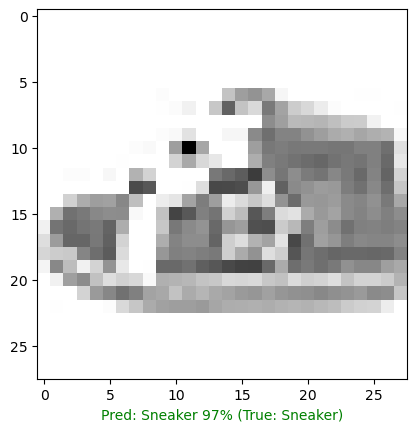

In [76]:
import random 

def plot_random_image(model, images, true_labels, classes):
    """
    Picks a random image, plots it and labels it with a prediction and truth label.
    """

    # Set up random integer 
    i = random.randint(0, len(images))

    # Create predictions and targets
    target_image = images[i]
    pred_probs = model.predict(target_image.reshape(1, 28, 28))
    pred_label = classes[pred_probs.argmax()]
    true_label = classes[true_labels[i]]

    # Plot the image 

    plt.imshow(target_image, cmap=plt.cm.binary)

    # Change the color of titles depending on if the prediction is right or wrong
    if pred_label == true_label:
        color = 'green'
    else:
        color = 'red'

    # Add xlael information (prediction/true label)
    plt.xlabel('Pred: {} {:2.0f}% (True: {})'.format(pred_label,
                                                    100*tf.reduce_max(pred_probs),
                                                    true_label),
              color=color)

plot_random_image(model_14, test_data_norm, test_labels, classes=class_names)

### What patterns is our model learning?

In [77]:
# Find the layers of our most recent model 
model_14.layers

[<Flatten name=flatten_9, built=True>,
 <Dense name=dense_30, built=True>,
 <Dense name=dense_31, built=True>,
 <Dense name=dense_32, built=True>]

In [78]:
# Extract a particular layer 
model_14.layers[1]

<Dense name=dense_30, built=True>

In [79]:
# Get the patterns of a layer in our network 
weights, biases = model_14.layers[1].get_weights()

# shapes 
weights, weights.shape

(array([[-0.05078544,  0.34128448,  0.05003615, -0.49297148],
        [ 0.06699131,  0.44767913, -0.27655506, -0.4127603 ],
        [ 0.0481274 ,  0.8768442 , -0.49540505, -0.7412914 ],
        ...,
        [ 0.02406108,  0.1707291 , -0.00293044, -0.28286102],
        [-0.00481022,  0.03551785, -0.32052317, -0.12852512],
        [ 0.04028022,  0.01347921, -0.620901  , -0.35101897]],
       dtype=float32),
 (784, 4))

In [80]:
biases, biases.shape

(array([-0.04015013,  2.769085  ,  2.3708043 ,  2.5575247 ], dtype=float32),
 (4,))

Every neuron has a bias vector. Each of these is paired with a weight matrix.

the bias vector get initialized as zeros (in Tensorflow dense layer)

The bias vector dictates how much the patterns withing the corresponding weights matrix should influence the next layer.

In [82]:
model_14.summary()

Model: "sequential_10"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ flatten_9 (Flatten)                  │ (None, 784)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_30 (Dense)                     │ (None, 4)                   │           3,140 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_31 (Dense)                     │ (None, 4)                   │              20 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_32 (Dense)                     │ (None, 10)                  │              50 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 9,632 (37.63 KB)

 Trainable params: 3,210 (12.54 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 6,422 (25.09 KB)

# Exercises

**1. Replicate the model pictured in the TensorFlow Playground diagram below using TensorFlow code. Compile it using the Adam optimizer, binary crossentropy loss and accuracy metric. Once it's compiled check a summary of the model. 
![](./images/classification_model.png)**

## Generate the data

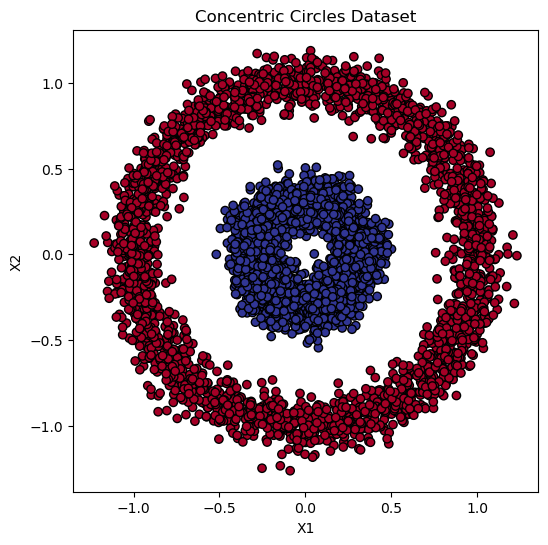

In [109]:
from sklearn.datasets import make_circles
import matplotlib.pyplot as plt

# Generate concentric circles
X, y = make_circles(n_samples=5000, noise=0.08, factor=0.3, random_state=42)

# Plot it
plt.figure(figsize=(6,6))
plt.scatter(X[:,0], X[:,1], c=y, cmap=plt.cm.RdYlBu, edgecolors='k')
plt.title("Concentric Circles Dataset")
plt.xlabel("X1")
plt.ylabel("X2")
plt.show()


## Split the data into train/test split

In [110]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [111]:
len(X_train), len(X_test)

(4000, 1000)

## Build a model

In [118]:
# Set the seed 
tf.random.set_seed(42)

# Create a model 
model_tfp = Sequential([
    Dense(6, activation='relu'),
    Dense(6, activation='relu'),
    Dense(6, activation='relu'),
    Dense(6, activation='relu'),
    Dense(6, activation='relu'),
    
    Dense(1, activation='sigmoid')
])

# Compile the model 
model_tfp.compile(loss=keras.losses.BinaryCrossentropy(),
                 optimizer=Adam(),
                 metrics=['accuracy'])

# Fit the model 
model_tfp.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.5172 - loss: 0.6667 - val_accuracy: 0.8410 - val_loss: 0.5278
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9354 - loss: 0.4260 - val_accuracy: 1.0000 - val_loss: 0.1594
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0972 - val_accuracy: 1.0000 - val_loss: 0.0190
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0136 - val_accuracy: 1.0000 - val_loss: 0.0058
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0047 - val_accuracy: 1.0000 - val_loss: 0.0028
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0024 - val_accuracy: 1.0000 - val_loss: 0.0017
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 0.0015 - val_accuracy: 1.0000 - val_loss: 0.0011
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 1.0000 - loss: 9.7971e-04 - val_accuracy

In [119]:
from mlxtend.plotting import plot_decision_regions


9600/9600 ━━━━━━━━━━━━━━━━━━━━ 7s 735us/step


<Axes: >

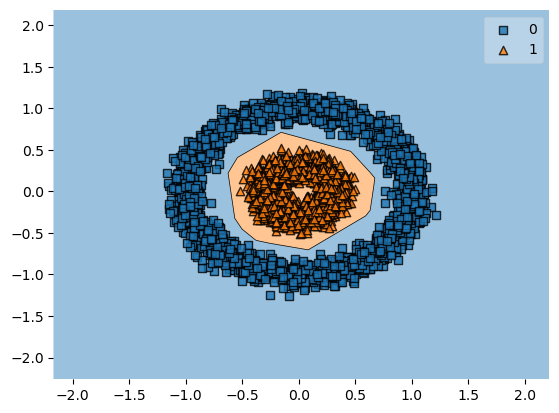

In [120]:
plot_decision_regions(X_train, y_train, model_tfp)

**2. Create a classification dataset using Scikit-Learn's make_moons() function, visualize it and then build a model to fit it at over 85% accuracy.**

In [121]:
from sklearn.datasets import make_moons

In [135]:
X, y = make_moons(n_samples=1000, noise=0.1, random_state=42)

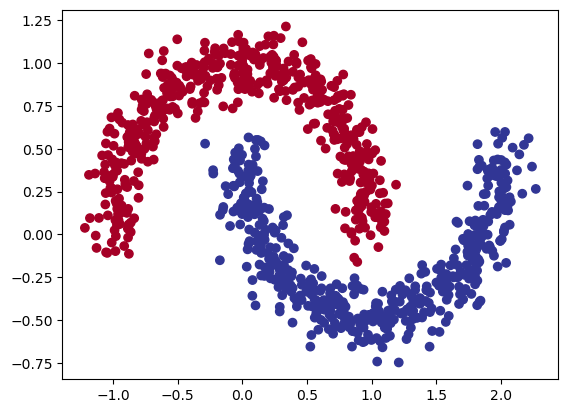

In [136]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)

## Split the data

In [137]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Build a model

In [139]:
# set seed
tf.random.set_seed(42)

# create a model 
model_moons_linear = Sequential([
    Dense(4, activation='linear'),
    Dense(4, activation='linear'),
    Dense(1, activation='sigmoid')
])

# compile a model 
model_moons_linear.compile(loss=keras.losses.BinaryCrossentropy(),
                          optimizer=Adam(),
                          metrics=['accuracy'])

# fit the model 
moons_history = model_moons_linear.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy: 0.3285 - loss: 0.8468 - val_accuracy: 0.3950 - val_loss: 0.7782
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.4087 - loss: 0.7680 - val_accuracy: 0.5850 - val_loss: 0.7106
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6024 - loss: 0.6992 - val_accuracy: 0.7700 - val_loss: 0.6501
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7776 - loss: 0.6373 - val_accuracy: 0.8550 - val_loss: 0.5956
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8660 - loss: 0.5816 - val_accuracy: 0.8850 - val_loss: 0.5469
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8436 - loss: 0.5321 - val_accuracy: 0.8600 - val_loss: 0.5042
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step - accuracy: 0.8291 - loss: 0.4891 - val_accuracy: 0.8400 - val_loss: 0.4676
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8271 - loss: 0.4528 - val_accuracy: 0.8350 - val_los

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 7s 677us/step


<Axes: >

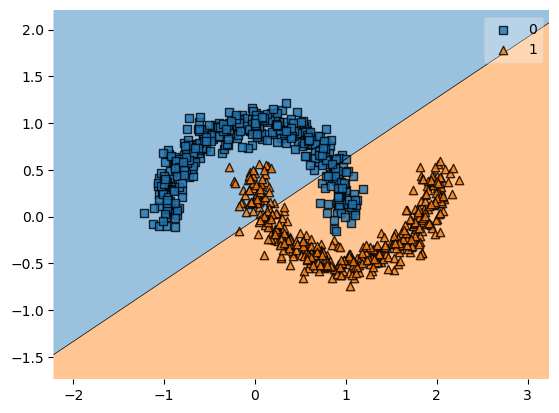

In [140]:
plot_decision_regions(X_train, y_train, model_moons_linear)

**This data definitely requires a non linear activation this is not linearly seperable**

## Build a model (non-linear activation)

In [141]:
# set seed
tf.random.set_seed(42)

# create a model 
model_moons_non_linear = Sequential([
    Dense(4, activation='relu'),
    Dense(4, activation='relu'),
    Dense(1, activation='sigmoid')
])

# compile a model 
model_moons_non_linear.compile(loss=keras.losses.BinaryCrossentropy(),
                          optimizer=Adam(),
                          metrics=['accuracy'])

# fit the model 
moons_non_linear_history = model_moons_non_linear.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - accuracy: 0.7212 - loss: 0.6705 - val_accuracy: 0.7950 - val_loss: 0.6513
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8359 - loss: 0.6486 - val_accuracy: 0.8750 - val_loss: 0.6298
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8629 - loss: 0.6269 - val_accuracy: 0.8700 - val_loss: 0.6070
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8670 - loss: 0.6032 - val_accuracy: 0.8700 - val_loss: 0.5826
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8678 - loss: 0.5780 - val_accuracy: 0.8650 - val_loss: 0.5565
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8626 - loss: 0.5513 - val_accuracy: 0.8500 - val_loss: 0.5288
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8573 - loss: 0.5231 - val_accuracy: 0.8500 - val_loss: 0.4995
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8573 - loss: 0.4940 - val_accuracy: 0.8500 - val_loss

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 7s 772us/step


<Axes: >

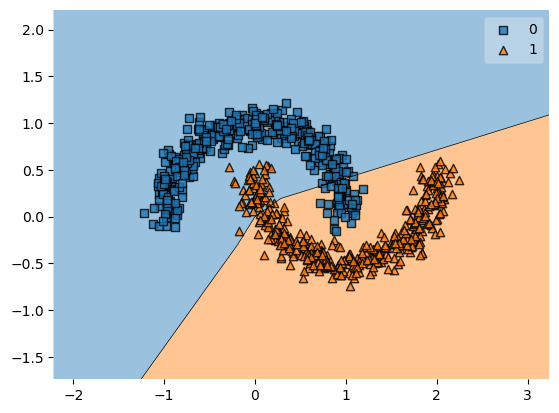

In [142]:
plot_decision_regions(X_train, y_train, model_moons_non_linear)

**Let's improve our model**

1. More hidden units

In [143]:
# set seed
tf.random.set_seed(42)

# create a model 
model_moons_non_linear = Sequential([
    Dense(10, activation='relu'),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')
])

# compile a model 
model_moons_non_linear.compile(loss=keras.losses.BinaryCrossentropy(),
                          optimizer=Adam(),
                          metrics=['accuracy'])

# fit the model 
moons_non_linear_history = model_moons_non_linear.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - accuracy: 0.5132 - loss: 0.6927 - val_accuracy: 0.6450 - val_loss: 0.6584
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.7008 - loss: 0.6493 - val_accuracy: 0.8550 - val_loss: 0.6214
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8563 - loss: 0.6105 - val_accuracy: 0.8700 - val_loss: 0.5840
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8623 - loss: 0.5714 - val_accuracy: 0.8650 - val_loss: 0.5456
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8643 - loss: 0.5317 - val_accuracy: 0.8700 - val_loss: 0.5057
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8663 - loss: 0.4924 - val_accuracy: 0.8750 - val_loss: 0.4704
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8681 - loss: 0.4589 - val_accuracy: 0.8700 - val_loss: 0.4399
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8652 - loss: 0.4307 - val_accuracy: 0.8700 - val_loss

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 7s 700us/step


<Axes: >

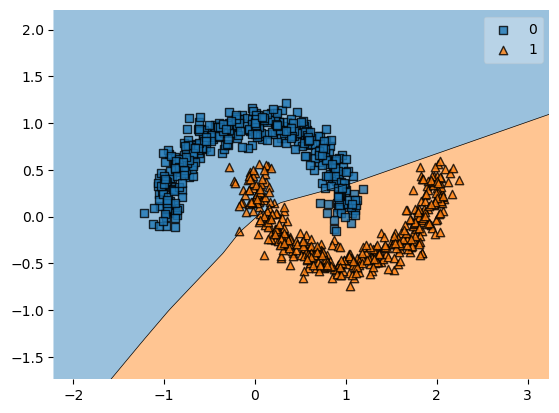

In [144]:
plot_decision_regions(X_train, y_train, model_moons_non_linear)

2. More hidden layers

In [145]:
# set seed
tf.random.set_seed(42)

# create a model 
model_moons_non_linear = Sequential([
    Dense(10, activation='relu'),
    Dense(10, activation='relu'),
    Dense(10, activation='relu'),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')
])

# compile a model 
model_moons_non_linear.compile(loss=keras.losses.BinaryCrossentropy(),
                          optimizer=Adam(),
                          metrics=['accuracy'])

# fit the model 
moons_non_linear_history = model_moons_non_linear.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)

Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.5760 - loss: 0.6944 - val_accuracy: 0.8500 - val_loss: 0.6805
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8172 - loss: 0.6771 - val_accuracy: 0.8950 - val_loss: 0.6606
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8884 - loss: 0.6541 - val_accuracy: 0.8800 - val_loss: 0.6241
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8555 - loss: 0.6115 - val_accuracy: 0.8700 - val_loss: 0.5601
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8614 - loss: 0.5390 - val_accuracy: 0.8650 - val_loss: 0.4661
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8617 - loss: 0.4431 - val_accuracy: 0.8700 - val_loss: 0.3656
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8724 - loss: 0.3561 - val_accuracy: 0.8650 - val_loss: 0.2982
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8722 - loss: 0.3072 - val_accuracy: 0.8800 - val_loss

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 7s 762us/step


<Axes: >

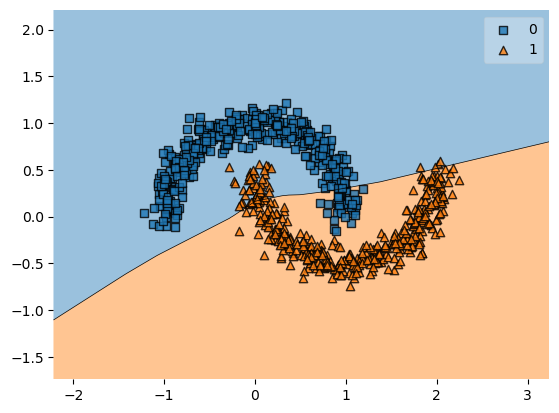

In [146]:
plot_decision_regions(X_train, y_train, model_moons_non_linear)

3. Let's find the best learning rate

In [147]:
# set seed
tf.random.set_seed(42)

# create a model 
model_moons_non_linear = Sequential([
    Dense(10, activation='relu'),
    Dense(10, activation='relu'),
    Dense(10, activation='relu'),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')
])

# compile a model 
model_moons_non_linear.compile(loss=keras.losses.BinaryCrossentropy(),
                          optimizer=Adam(),
                          metrics=['accuracy'])

# setup a scheduler
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# fit the model 
moons_non_linear_history = model_moons_non_linear.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10,
                                                     callbacks=[lr_scheduler])


Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 12ms/step - accuracy: 0.7896 - loss: 0.6657 - val_accuracy: 0.7600 - val_loss: 0.6276 - learning_rate: 0.0010
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8036 - loss: 0.6016 - val_accuracy: 0.8050 - val_loss: 0.5360 - learning_rate: 0.0011
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8309 - loss: 0.5103 - val_accuracy: 0.8300 - val_loss: 0.4467 - learning_rate: 0.0013
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8349 - loss: 0.4254 - val_accuracy: 0.8900 - val_loss: 0.3533 - learning_rate: 0.0014
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8716 - loss: 0.3440 - val_accuracy: 0.8800 - val_loss: 0.2802 - learning_rate: 0.0016
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.8731 - loss: 0.2827 - val_accuracy: 0.8800 - val_loss: 0.2355 - learning_rate: 0.0018
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.8798 - loss: 0.2469 - val_accuracy:

Text(0.5, 1.0, 'Finding the idean learning rate')

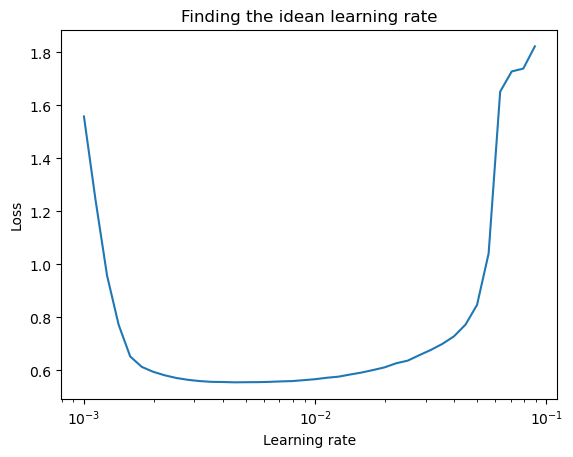

In [148]:
# Plot the learning rate decay curve 
import numpy as np 

lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history['loss'])
plt.xlabel('Learning rate')
plt.ylabel('Loss')
plt.title("Finding the idean learning rate")

**10e-3 seems best**

In [149]:
10e-3

0.01

**Train with 0.01 lr**

In [150]:
# set seed
tf.random.set_seed(42)

# create a model 
model_moons_non_linear = Sequential([
    Dense(10, activation='relu'),
    Dense(10, activation='relu'),
    Dense(10, activation='relu'),
    Dense(10, activation='relu'),
    Dense(1, activation='sigmoid')
])

# compile a model 
model_moons_non_linear.compile(loss=keras.losses.BinaryCrossentropy(),
                          optimizer=Adam(learning_rate=0.01),
                          metrics=['accuracy'])

# fit the model 
moons_non_linear_history = model_moons_non_linear.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=10)


Epoch 1/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - accuracy: 0.6965 - loss: 0.5460 - val_accuracy: 0.8500 - val_loss: 0.3229
Epoch 2/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8541 - loss: 0.3264 - val_accuracy: 0.8500 - val_loss: 0.2896
Epoch 3/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8716 - loss: 0.2999 - val_accuracy: 0.8650 - val_loss: 0.2676
Epoch 4/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8668 - loss: 0.2828 - val_accuracy: 0.8700 - val_loss: 0.2195
Epoch 5/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.8964 - loss: 0.2202 - val_accuracy: 0.9550 - val_loss: 0.1307
Epoch 6/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9522 - loss: 0.1190 - val_accuracy: 0.9950 - val_loss: 0.0427
Epoch 7/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9867 - loss: 0.0397 - val_accuracy: 1.0000 - val_loss: 0.0073
Epoch 8/10
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.9950 - loss: 0.0146 - val_accuracy: 1.0000 - val_loss

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 8s 778us/step


<Axes: >

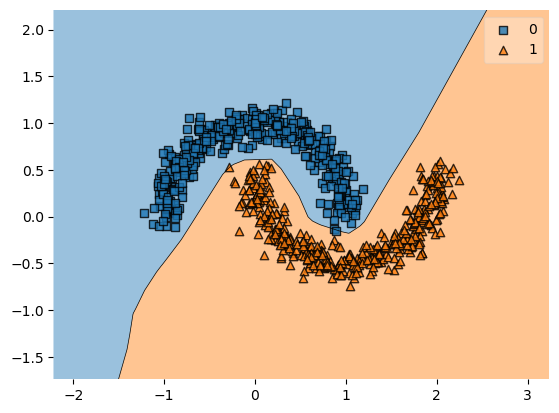

In [151]:
plot_decision_regions(X_train, y_train, model_moons_non_linear)

**WOW**

In [152]:
# let's evalute 
model_moons_non_linear.evaluate(X_test, y_test)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 1.0000 - loss: 0.0014     


[0.0014131200732663274, 1.0]

**100% accuracy**

**3. Train a model to get 88%+ accuracy on the fashion MNIST test set. Plot a confusion matrix to see the results after.**

In [154]:
train_data.shape, test_data.shape

((60000, 28, 28), (10000, 28, 28))

## Build a Model

In [155]:
# set seeds 
tf.random.set_seed(42)

# create a model 
model_fashion = Sequential(
    [
        Input(shape=(28, 28)),
        Flatten(),
        Dense(10, activation='relu'),
        Dense(10, activation='relu'),
        Dense(10, activation='relu'),
        Dense(10, activation='softmax')
    ]
)

# compile the model 
model_fashion.compile(loss=SparseCategoricalCrossentropy(),
                     optimizer=Adam(),
                     metrics=['accuracy'])

# fit the model 
history = model_fashion.fit(train_data,
                 train_labels,
                 validation_data=(test_data, test_labels),
                 epochs=20)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.1625 - loss: 3.1304 - val_accuracy: 0.2721 - val_loss: 1.7063
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3136 - loss: 1.6569 - val_accuracy: 0.3612 - val_loss: 1.5127
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3680 - loss: 1.5012 - val_accuracy: 0.4336 - val_loss: 1.3095
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4526 - loss: 1.2759 - val_accuracy: 0.4344 - val_loss: 1.3371
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4607 - loss: 1.2489 - val_accuracy: 0.5271 - val_loss: 1.1521
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5261 - loss: 1.1257 - val_accuracy: 0.5700 - val_loss: 1.0175
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5552 - loss: 1.0283 - val_accuracy: 0.5834 - val_loss: 0.9965
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5722 - loss: 1.0010 - 

**Let's find the best learning rate**

In [156]:
# set seeds 
tf.random.set_seed(42)

# create a model 
model_fashion = Sequential(
    [
        Input(shape=(28, 28)),
        Flatten(),
        Dense(10, activation='relu'),
        Dense(10, activation='relu'),
        Dense(10, activation='relu'),
        Dense(10, activation='softmax')
    ]
)

# compile the model 
model_fashion.compile(loss=SparseCategoricalCrossentropy(),
                     optimizer=Adam(),
                     metrics=['accuracy'])
# setup a scheduler
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-3 * 10**(epoch/20))

# fit the model 
history = model_fashion.fit(train_data,
                 train_labels,
                 validation_data=(test_data, test_labels),
                 epochs=20,
                           callbacks=[lr_scheduler])


Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.1433 - loss: 2.7111 - val_accuracy: 0.4132 - val_loss: 1.5193 - learning_rate: 0.0010
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.5155 - loss: 1.2610 - val_accuracy: 0.6750 - val_loss: 0.8354 - learning_rate: 0.0011
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6732 - loss: 0.8509 - val_accuracy: 0.6768 - val_loss: 0.8353 - learning_rate: 0.0013
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6858 - loss: 0.8125 - val_accuracy: 0.6874 - val_loss: 0.7865 - learning_rate: 0.0014
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6950 - loss: 0.7893 - val_accuracy: 0.6750 - val_loss: 0.8196 - learning_rate: 0.0016
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.6971 - loss: 0.7641 - val_accuracy: 0.6773 - val_loss: 0.8398 - learning_rate: 0.0018
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.7047 - l

Text(0.5, 1.0, 'Finding the idean learning rate')

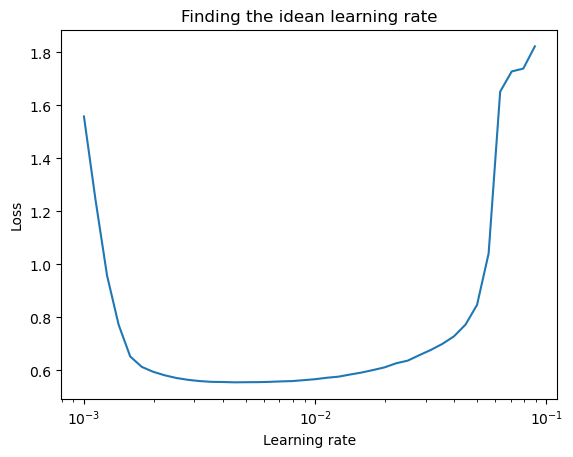

In [157]:
lrs = 1e-3 * (10**(tf.range(40)/20))
plt.semilogx(lrs, find_lr_history.history['loss'])
plt.xlabel('Learning rate')
plt.ylabel('Loss')
plt.title("Finding the idean learning rate")

**Train with 0.001 lr**

In [162]:
# set seeds 
tf.random.set_seed(42)

# create a model 
model_fashion = Sequential(
    [
        Input(shape=(28, 28)),
        Flatten(),
        Dense(10, activation='relu'),
        Dense(10, activation='relu'),
        Dense(10, activation='relu'),
        Dense(10, activation='softmax')
    ]
)

# compile the model 
model_fashion.compile(loss=SparseCategoricalCrossentropy(),
                     optimizer=Adam(learning_rate=0.001),
                     metrics=['accuracy'])

# fit the model 
history = model_fashion.fit(train_data,
                 train_labels,
                 validation_data=(test_data, test_labels),
                 epochs=20)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.2060 - loss: 3.3856 - val_accuracy: 0.3417 - val_loss: 1.6686
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.3494 - loss: 1.5283 - val_accuracy: 0.3709 - val_loss: 1.4622
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4231 - loss: 1.3450 - val_accuracy: 0.4625 - val_loss: 1.2248
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4650 - loss: 1.2274 - val_accuracy: 0.4608 - val_loss: 1.2329
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4666 - loss: 1.2157 - val_accuracy: 0.4890 - val_loss: 1.2183
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4747 - loss: 1.2099 - val_accuracy: 0.4651 - val_loss: 1.2170
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.4885 - loss: 1.1866 - val_accuracy: 0.5204 - val_loss: 1.0867
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.5303 - loss: 1.0737 - 

**Let's increase the hidden layers**

In [163]:
# set seeds 
tf.random.set_seed(42)

# create a model 
model_fashion = Sequential(
    [
        Input(shape=(28, 28)),
        Flatten(),
        Dense(10, activation='relu'),
        Dense(10, activation='relu'),
        Dense(20, activation='relu'),
        Dense(20, activation='relu'),
        Dense(30, activation='relu'),
        Dense(30, activation='relu'),
        Dense(10, activation='softmax')
    ]
)

# compile the model 
model_fashion.compile(loss=SparseCategoricalCrossentropy(),
                     optimizer=Adam(learning_rate=0.001),
                     metrics=['accuracy'])

# fit the model 
history = model_fashion.fit(train_data,
                 train_labels,
                 validation_data=(test_data, test_labels),
                 epochs=20)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.5179 - loss: 1.4121 - val_accuracy: 0.7606 - val_loss: 0.6545
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7678 - loss: 0.6417 - val_accuracy: 0.7721 - val_loss: 0.6272
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7868 - loss: 0.5838 - val_accuracy: 0.7742 - val_loss: 0.6640
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8037 - loss: 0.5442 - val_accuracy: 0.8010 - val_loss: 0.5502
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8143 - loss: 0.5158 - val_accuracy: 0.7837 - val_loss: 0.6099
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8191 - loss: 0.5037 - val_accuracy: 0.8237 - val_loss: 0.5038
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8246 - loss: 0.4900 - val_accuracy: 0.8217 - val_loss: 0.5055
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8312 - loss: 0.4775 - 

**Let's Increase the hidden units**

In [164]:
# set seeds 
tf.random.set_seed(42)

# create a model 
model_fashion = Sequential(
    [
        Input(shape=(28, 28)),
        Flatten(),
        Dense(20, activation='relu'),
        Dense(20, activation='relu'),
        Dense(30, activation='relu'),
        Dense(30, activation='relu'),
        Dense(50, activation='relu'),
        Dense(50, activation='relu'),
        Dense(10, activation='softmax')
    ]
)

# compile the model 
model_fashion.compile(loss=SparseCategoricalCrossentropy(),
                     optimizer=Adam(learning_rate=0.001),
                     metrics=['accuracy'])

# fit the model 
history = model_fashion.fit(train_data,
                 train_labels,
                 validation_data=(test_data, test_labels),
                 epochs=20)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.4560 - loss: 1.5853 - val_accuracy: 0.7164 - val_loss: 0.6874
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7200 - loss: 0.6671 - val_accuracy: 0.7302 - val_loss: 0.6393
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7347 - loss: 0.6241 - val_accuracy: 0.7044 - val_loss: 0.6783
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7368 - loss: 0.6130 - val_accuracy: 0.7310 - val_loss: 0.6462
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7436 - loss: 0.5982 - val_accuracy: 0.7328 - val_loss: 0.6400
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7443 - loss: 0.6067 - val_accuracy: 0.7360 - val_loss: 0.6203
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7497 - loss: 0.5803 - val_accuracy: 0.7294 - val_loss: 0.6914
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7522 - loss: 0.5802 - 

**let's increase the hidden layers more**

In [165]:
# set seeds 
tf.random.set_seed(42)

# create a model 
model_fashion = Sequential(
    [
        Input(shape=(28, 28)),
        Flatten(),
        Dense(20, activation='relu'),
        Dense(20, activation='relu'),
        Dense(30, activation='relu'),
        Dense(30, activation='relu'),
        Dense(50, activation='relu'),
        Dense(50, activation='relu'),
        Dense(50, activation='relu'),
        Dense(50, activation='relu'),
        Dense(10, activation='softmax')
    ]
)

# compile the model 
model_fashion.compile(loss=SparseCategoricalCrossentropy(),
                     optimizer=Adam(learning_rate=0.001),
                     metrics=['accuracy'])

# fit the model 
history = model_fashion.fit(train_data,
                 train_labels,
                 validation_data=(test_data, test_labels),
                 epochs=20)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 2ms/step - accuracy: 0.6168 - loss: 1.1773 - val_accuracy: 0.7799 - val_loss: 0.5921
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8061 - loss: 0.5464 - val_accuracy: 0.8122 - val_loss: 0.5192
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8237 - loss: 0.4897 - val_accuracy: 0.8108 - val_loss: 0.5124
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8327 - loss: 0.4605 - val_accuracy: 0.8234 - val_loss: 0.4739
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8414 - loss: 0.4347 - val_accuracy: 0.8178 - val_loss: 0.4832
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8440 - loss: 0.4296 - val_accuracy: 0.8313 - val_loss: 0.4596
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8518 - loss: 0.4087 - val_accuracy: 0.8360 - val_loss: 0.4592
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8555 - loss: 0.3985 - 

<Axes: >

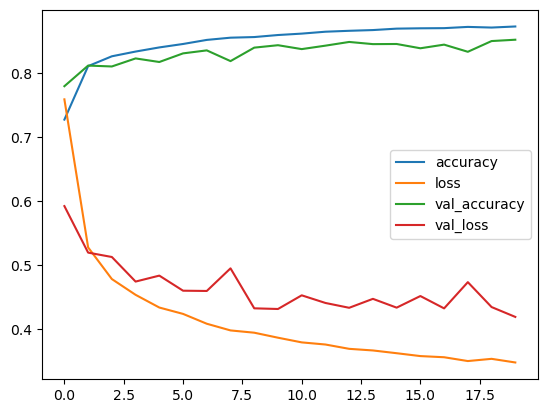

In [166]:
pd.DataFrame(history.history).plot()

**Model seems to overfit the data let's add some kind of regularization**

In [168]:
# set seeds 
tf.random.set_seed(42)

# create a model 
model_fashion = Sequential(
    [
        Input(shape=(28, 28)),
        Flatten(),
        Dense(20, activation='relu'),
        Dense(20, activation='relu'),
        tf.keras.layers.Dropout(rate=0.2),
        Dense(30, activation='relu'),
        Dense(30, activation='relu'),
        Dense(50, activation='relu'),
        Dense(50, activation='relu'),
        Dense(50, activation='relu'),
        tf.keras.layers.Dropout(rate=0.2),
        Dense(50, activation='relu'),
        Dense(10, activation='softmax')
    ]
)

# compile the model 
model_fashion.compile(loss=SparseCategoricalCrossentropy(),
                     optimizer=Adam(learning_rate=0.001),
                     metrics=['accuracy'])

# fit the model 
history = model_fashion.fit(train_data,
                 train_labels,
                 validation_data=(test_data, test_labels),
                 epochs=20)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.5140 - loss: 1.3630 - val_accuracy: 0.7448 - val_loss: 0.6656
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7279 - loss: 0.6971 - val_accuracy: 0.7701 - val_loss: 0.6011
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7630 - loss: 0.6233 - val_accuracy: 0.7470 - val_loss: 0.6163
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7836 - loss: 0.5858 - val_accuracy: 0.7933 - val_loss: 0.5816
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7973 - loss: 0.5589 - val_accuracy: 0.7484 - val_loss: 0.6694
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8006 - loss: 0.5618 - val_accuracy: 0.7976 - val_loss: 0.5769
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8025 - loss: 0.5455 - val_accuracy: 0.8022 - val_loss: 0.5481
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.8062 - loss: 0.5368 - 

<Axes: >

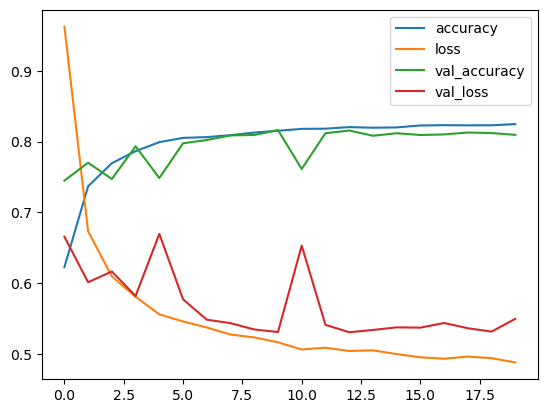

In [169]:
pd.DataFrame(history.history).plot()

**Let's use different activation function**

In [170]:
# set seeds 
tf.random.set_seed(42)

# create a model 
model_fashion = Sequential(
    [
        Input(shape=(28, 28)),
        Flatten(),
        Dense(20, activation='elu'),
        Dense(20, activation='elu'),
        tf.keras.layers.Dropout(rate=0.2),
        Dense(30, activation='elu'),
        Dense(30, activation='elu'),
        Dense(50, activation='elu'),
        Dense(50, activation='elu'),
        Dense(50, activation='elu'),
        tf.keras.layers.Dropout(rate=0.2),
        Dense(50, activation='elu'),
        Dense(10, activation='softmax')
    ]
)

# compile the model 
model_fashion.compile(loss=SparseCategoricalCrossentropy(),
                     optimizer=Adam(learning_rate=0.001),
                     metrics=['accuracy'])

# fit the model 
history = model_fashion.fit(train_data,
                 train_labels,
                 validation_data=(test_data, test_labels),
                 epochs=20)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 2ms/step - accuracy: 0.5171 - loss: 1.3481 - val_accuracy: 0.7310 - val_loss: 0.6663
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7182 - loss: 0.7019 - val_accuracy: 0.7333 - val_loss: 0.6489
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7375 - loss: 0.6543 - val_accuracy: 0.7367 - val_loss: 0.6403
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7565 - loss: 0.6088 - val_accuracy: 0.7600 - val_loss: 0.6216
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7799 - loss: 0.5838 - val_accuracy: 0.7611 - val_loss: 0.6497
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7940 - loss: 0.5482 - val_accuracy: 0.7943 - val_loss: 0.5540
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7925 - loss: 0.5470 - val_accuracy: 0.7964 - val_loss: 0.5422
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.7991 - loss: 0.5387 - 

**let's add few more layers**

In [171]:
# set seeds 
tf.random.set_seed(42)

# create a model 
model_fashion = Sequential(
    [
        Input(shape=(28, 28)),
        Flatten(),
        Dense(20, activation='relu'),
        Dense(20, activation='relu'),
        tf.keras.layers.Dropout(rate=0.2),
        Dense(30, activation='relu'),
        Dense(30, activation='relu'),
        Dense(50, activation='relu'),
        Dense(50, activation='relu'),
        Dense(50, activation='relu'),
        Dense(50, activation='relu'),
        Dense(50, activation='relu'),
        Dense(50, activation='relu'),
        tf.keras.layers.Dropout(rate=0.2),
        Dense(50, activation='relu'),
        Dense(10, activation='softmax')
    ]
)

# compile the model 
model_fashion.compile(loss=SparseCategoricalCrossentropy(),
                     optimizer=Adam(learning_rate=0.001),
                     metrics=['accuracy'])

# fit the model 
history = model_fashion.fit(train_data,
                 train_labels,
                 validation_data=(test_data, test_labels),
                 epochs=20)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.4812 - loss: 1.3363 - val_accuracy: 0.6095 - val_loss: 0.9270
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6173 - loss: 0.9145 - val_accuracy: 0.6342 - val_loss: 0.8950
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.6911 - loss: 0.8071 - val_accuracy: 0.7043 - val_loss: 0.7524
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7159 - loss: 0.7373 - val_accuracy: 0.7183 - val_loss: 0.7173
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7172 - loss: 0.7222 - val_accuracy: 0.7407 - val_loss: 0.6933
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7349 - loss: 0.6874 - val_accuracy: 0.7276 - val_loss: 0.7085
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7238 - loss: 0.7074 - val_accuracy: 0.7171 - val_loss: 0.7204
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.7325 - loss: 0.6853 - 

**Let's try batchnormalization with normalized input data**

In [173]:
# set seeds 
tf.random.set_seed(42)

# create a model 
model_fashion = Sequential(
    [
        Input(shape=(28, 28)),
        Flatten(),
        Dense(20, activation='relu'),
        Dense(20, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        Dense(30, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        Dense(30, activation='relu'),
        Dense(50, activation='relu'),
        Dense(50, activation='relu'),
        Dense(50, activation='relu'),
        tf.keras.layers.BatchNormalization(),
        Dense(50, activation='relu'),
        Dense(50, activation='relu'),
        Dense(50, activation='relu'),
        Dense(50, activation='relu'),
        Dense(10, activation='softmax')
    ]
)

# compile the model 
model_fashion.compile(loss=SparseCategoricalCrossentropy(),
                     optimizer=Adam(learning_rate=0.001),
                     metrics=['accuracy'])

# fit the model 
history = model_fashion.fit(train_data_norm,
                 train_labels,
                 validation_data=(test_data_norm, test_labels),
                 epochs=20)

Epoch 1/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.6677 - loss: 0.9214 - val_accuracy: 0.8145 - val_loss: 0.5188
Epoch 2/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8270 - loss: 0.4971 - val_accuracy: 0.8366 - val_loss: 0.4659
Epoch 3/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8422 - loss: 0.4502 - val_accuracy: 0.8417 - val_loss: 0.4403
Epoch 4/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8497 - loss: 0.4238 - val_accuracy: 0.8517 - val_loss: 0.4318
Epoch 5/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8550 - loss: 0.4048 - val_accuracy: 0.8522 - val_loss: 0.4204
Epoch 6/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8587 - loss: 0.3914 - val_accuracy: 0.8530 - val_loss: 0.4251
Epoch 7/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8610 - loss: 0.3793 - val_accuracy: 0.8445 - val_loss: 0.4473
Epoch 8/20
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.8665 - loss: 0.3692 -

**Finally we have crossed 88% + accuracy**

313/313 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step 


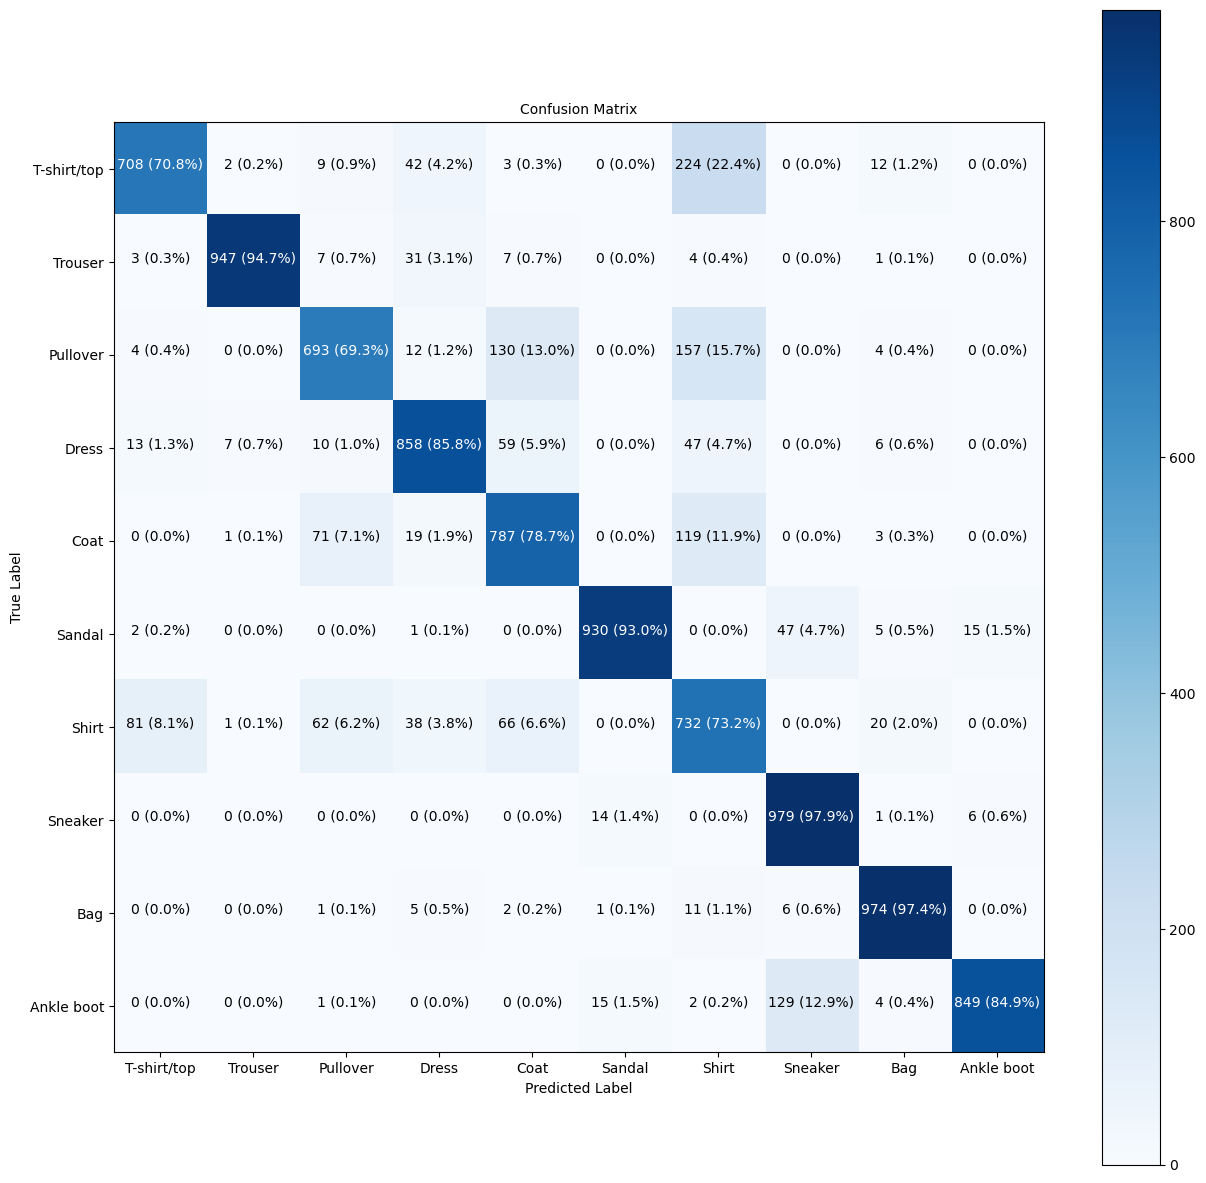

In [176]:
y_probs = model_fashion.predict(test_data_norm)
y_preds = y_probs.argmax(axis=1)
make_confusion_matrix(y_true=test_labels, y_pred=y_preds,
                     classes=class_names,
                     figsize=(15, 15),
                     text_size=10)

**5. Recreate TensorFlow's softmax activation function in your own code. Make sure it can accept a tensor and return that tensor after having the softmax function applied to it.**

In [183]:
def softmax(x):
    x = x - tf.reduce_max(x, axis=-1, keepdims=True)  
    num = tf.exp(x)
    den = tf.reduce_sum(num, axis=-1, keepdims=True)
    return num / den   

tensor = tf.constant([0.1 , 0.23, 0.324, 0.13, 0.234, 0.2345])
tensor

<tf.Tensor: shape=(6,), dtype=float32, numpy=array([0.1   , 0.23  , 0.324 , 0.13  , 0.234 , 0.2345], dtype=float32)>

In [184]:
tf.reduce_sum(softmax(tensor))

<tf.Tensor: shape=(), dtype=float32, numpy=1.0>